In [11]:
import scanpy as sp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import random
import numpy as np
import umap
import os
import datetime
import torch

from plot_figure import generate_umap,\
                        generate_umap_snc,\
                        bar_plot_condition,\
                        bar_plot_location,\
                        bar_plot_age,\
                        generate_heatmap,\
                        generate_heatmap_snc,\
                        create_summary_table



In [2]:
new_data=sp.read_h5ad("/bmbl_data/chenghao/sencell/hudata_data1_newdata.h5ad")
new_data

AnnData object with n_obs × n_vars = 24125 × 15814
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X.1', 'X', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflamm

In [3]:
new_data.X.todense()

matrix([[1., 0., 0., ..., 0., 5., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.]], dtype=float32)

In [4]:
new_data.obs['clusters'].value_counts()

clusters
Endothelial cells              4313
AT2 cells                      2305
Alveolar fibroblasts           2154
Alveolar macrophages           2016
CD4 cells                      1625
AT1 cells                      1401
Plasma cells                   1273
Classical Monocytes             842
SMC                             832
Ciliated                        803
FABP4 macrophages               636
Adventitial                     626
Subepithelial fibroblasts       554
SPP1 macrophages                548
RAS cells                       545
CHTRC1+ fibroblasts             503
Secretory cells                 494
NK cells                        491
Pericytes                       467
Basal cells                     427
CD8 cells                       363
Mast cells                      327
Endothelial Lymphatic cells     232
B cells                         199
Aberrant basaloid cells         149
Name: count, dtype: int64

/tmp/ipykernel_3825196/1414714676.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sencell_dict,sen_gene_ls,attention_scores,edge_index_selfloop=torch.load(file_path)


snc in different cell types:  Counter({'Endothelial cells': 311, 'AT2 cells': 151, 'Alveolar macrophages': 139, 'Alveolar fibroblasts': 135, 'CD4 cells': 135, 'Plasma cells': 113, 'AT1 cells': 76, 'SMC': 67, 'Classical Monocytes': 56, 'Ciliated': 56, 'Subepithelial fibroblasts': 52, 'NK cells': 44, 'CD8 cells': 41, 'SPP1 macrophages': 39, 'CHTRC1+ fibroblasts': 39, 'Pericytes': 38, 'Adventitial': 37, 'RAS cells': 30, 'Secretory cells': 30, 'FABP4 macrophages': 26, 'Basal cells': 22, 'Mast cells': 21, 'B cells': 20, 'Endothelial Lymphatic cells': 11, 'Aberrant basaloid cells': 10})
Number of SnC: 1699
Status                       Healthy  IPF
clusters                                 
AT1 cells                         27   49
AT2 cells                         59   92
Aberrant basaloid cells            2    8
Adventitial                        6   31
Alveolar fibroblasts              26  109
Alveolar macrophages              33  106
B cells                            2   18
Basal cells   

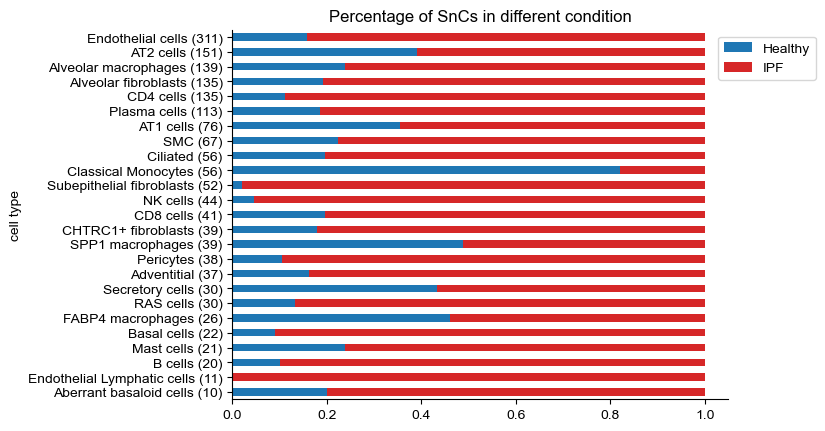

Area                         Lower Lobe  Parenchyma  Upper Lobe
clusters                                                       
AT1 cells                            38          27          11
AT2 cells                            69          59          23
Aberrant basaloid cells               7           2           1
Adventitial                          14           6          17
Alveolar fibroblasts                 52          26          57
Alveolar macrophages                 64          33          42
B cells                              10           2           8
Basal cells                           2           2          18
CD4 cells                           106          15          14
CD8 cells                            23           8          10
CHTRC1+ fibroblasts                  11           7          21
Ciliated                             12          11          33
Classical Monocytes                   6          46           4
Endothelial Lymphatic cells           5 

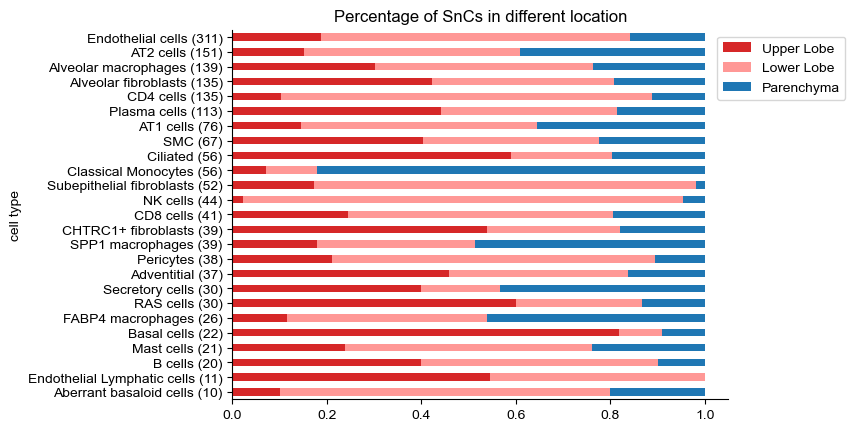

Age_Status                   Old  Young
clusters                               
AT1 cells                     72      4
AT2 cells                    131     20
Aberrant basaloid cells       10      0
Adventitial                   35      2
Alveolar fibroblasts         133      2
Alveolar macrophages         134      5
B cells                       20      0
Basal cells                   22      0
CD4 cells                    135      0
CD8 cells                     41      0
CHTRC1+ fibroblasts           39      0
Ciliated                      56      0
Classical Monocytes           54      2
Endothelial Lymphatic cells   11      0
Endothelial cells            309      2
FABP4 macrophages             17      9
Mast cells                    20      1
NK cells                      44      0
Pericytes                     38      0
Plasma cells                 113      0
RAS cells                     28      2
SMC                           66      1
SPP1 macrophages              32      7


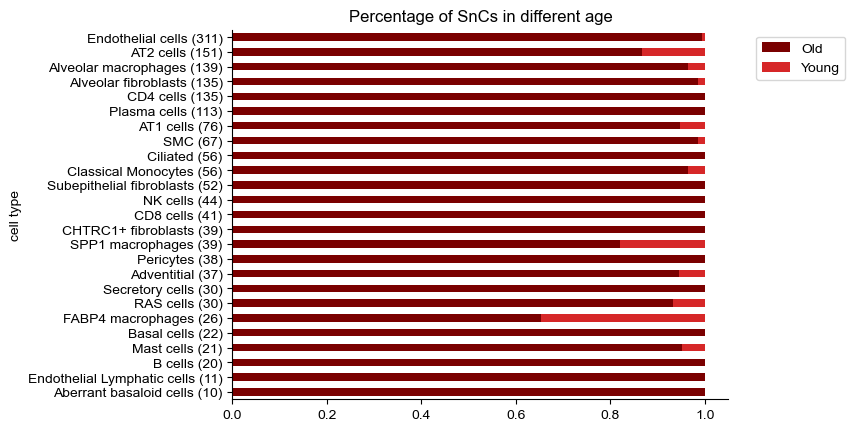

In [5]:
def check_celltypes(adata, predicted_cell_indexs):
    res=[]
    for i in predicted_cell_indexs:
        res.append(adata.obs.iloc[i-adata.shape[1]].clusters)
    from collections import Counter
    print("snc in different cell types: ",Counter(res))
    return Counter(res)

adata=new_data.copy()

# using the results of epoch 4
file_path=f'./outputs/-data1/data1_sencellgene-epoch{4}.data'
sencell_dict,sen_gene_ls,attention_scores,edge_index_selfloop=torch.load(file_path)
sencell_indexs=list(sencell_dict.keys())

a=dict(check_celltypes(new_data,sencell_indexs))
sorted_dict = dict(sorted(a.items(), key=lambda item: item[1], reverse=True))

# select cell types
# selected_ct=['Endothelial cells',
#  'AT2 cells',
#  'Alveolar macrophages',
# 'Alveolar fibroblasts',
#  'CD4 cells',
#  'Plasma cells',
#              'AT1 cells',
#              'CTHRC1+ fibroblasts' ,'NK cells']

# select cell types, for all ct
selected_ct=[]
for key, value in sorted_dict.items():
    if value >= 10:
        selected_ct.append(key)

sencell_indexs_updated=[]
for i in sencell_indexs:
    ct=adata.obs.iloc[i-new_data.shape[1]].clusters
    if ct in selected_ct:
        sencell_indexs_updated.append(i)
        
sencell_indexs=sencell_indexs_updated
row_indices= np.array(sencell_indexs)-new_data.shape[1]
new_column = np.array(['normal']*adata.shape[0])
new_column[row_indices] = 'SnC'
adata.obs['is_sen'] = new_column

adata.obs['clusters']=adata.obs['clusters'].astype(str)

def create_column(row):
    if row['is_sen']=='SnC':
        return 'SnC'
    else:
        return row['clusters']
adata.obs['new_ct'] = adata.obs.apply(create_column, axis=1)

print(f"Number of SnC: {adata.obs['is_sen'].value_counts()['SnC']}")

sub_sencells=adata[adata.obs['is_sen']=='SnC']
sub_sencells=sub_sencells[sub_sencells.obs["clusters"].isin(selected_ct)]
bar_plot_condition(sub_sencells)
bar_plot_location(sub_sencells)
bar_plot_age(sub_sencells)

In [6]:
sub_sencells.shape

(1699, 15814)

In [7]:
adata.obs['is_sen'].value_counts()

is_sen
normal    22426
SnC        1699
Name: count, dtype: int64

In [8]:
final_table=create_summary_table(adata)
final_table

CT # cell # IPF non-SnC # IPF SnC   IPF SnC%  \
0           Classical Monocytes    842           229        10   4.184100   
1                     AT2 cells   2305          1609        92   5.408583   
2              SPP1 macrophages    548           231        20   7.968127   
3          Alveolar macrophages   2016          1173       106   8.287725   
4                  Plasma cells   1273           697        92  11.660330   
5             FABP4 macrophages    636           504        14   2.702703   
6                     AT1 cells   1401          1122        49   4.184458   
7          Alveolar fibroblasts   2154          1472       109   6.894371   
8                     CD4 cells   1625          1205       120   9.056604   
9             Endothelial cells   4313          2975       262   8.093914   
10                  Adventitial    626           428        31   6.753813   
11      Aberrant basaloid cells    149           119         8   6.299213   
12                    RAS cells    545           437        26   5.615551   
13                          SMC    832           498        52   9.454545   
14                      B cells    199           139        18  11.464968   
15                  Basal cells    427           344        20   5.494505   
16          CHTRC1+ fibroblasts    503           302        32   9.580838   
17                   Mast cells    327           224        16   6.666667   
18  Endothelial Lymphatic cells    232           139        11   7.333333   
19    Subepithelial fibroblasts    554           489        51   9.444444   
20                     NK cells    491           376        42  10.047847   
21                    Pericytes    467           349        34   8.877285   
22                    CD8 cells    363           223        33  12.890625   
23              Secretory cells    494           327        17   4.941860   
24                     Ciliated    803           622        45   6.746627   

   # Healthy non-SnC # Healthy SnC  Healthy SnC% # UL non-SnC # UL SnC  ...  \
0                557            46      7.628524           76        4  ...   
1                545            59      9.768212          284       23  ...   
2                278            19      6.397306           83        7  ...   
3                704            33      4.477612          383       42  ...   
4                463            21      4.338843          363       50  ...   
5                106            12     10.169492          142        3  ...   
6                203            27     11.739130          168       11  ...   
7                547            26      4.537522          547       57  ...   
8                285            15      5.000000          205       14  ...   
9               1027            49      4.553903          536       58  ...   
10               161             6      3.592814          213       17  ...   
11                20             2      9.090909           44        1  ...   
12                78             4      4.878049          203       18  ...   
13               267            15      5.319149          272       27  ...   
14                40             2      4.761905           45        8  ...   
15                61             2      3.174603          268       18  ...   
16               162             7      4.142012          155       21  ...   
17                82             5      5.747126           64        5  ...   
18                82             0      0.000000           66        6  ...   
19                13             1      7.142857           82        9  ...   
20                71             2      2.739726           23        1  ...   
21                80             4      4.761905           68        8  ...   
22                99             8      7.476636           51       10  ...   
23               137            13      8.666667          194       12  ...   
24               125            11      8.088235   

In [9]:
# final_table.to_csv("final_table.csv", index=False)

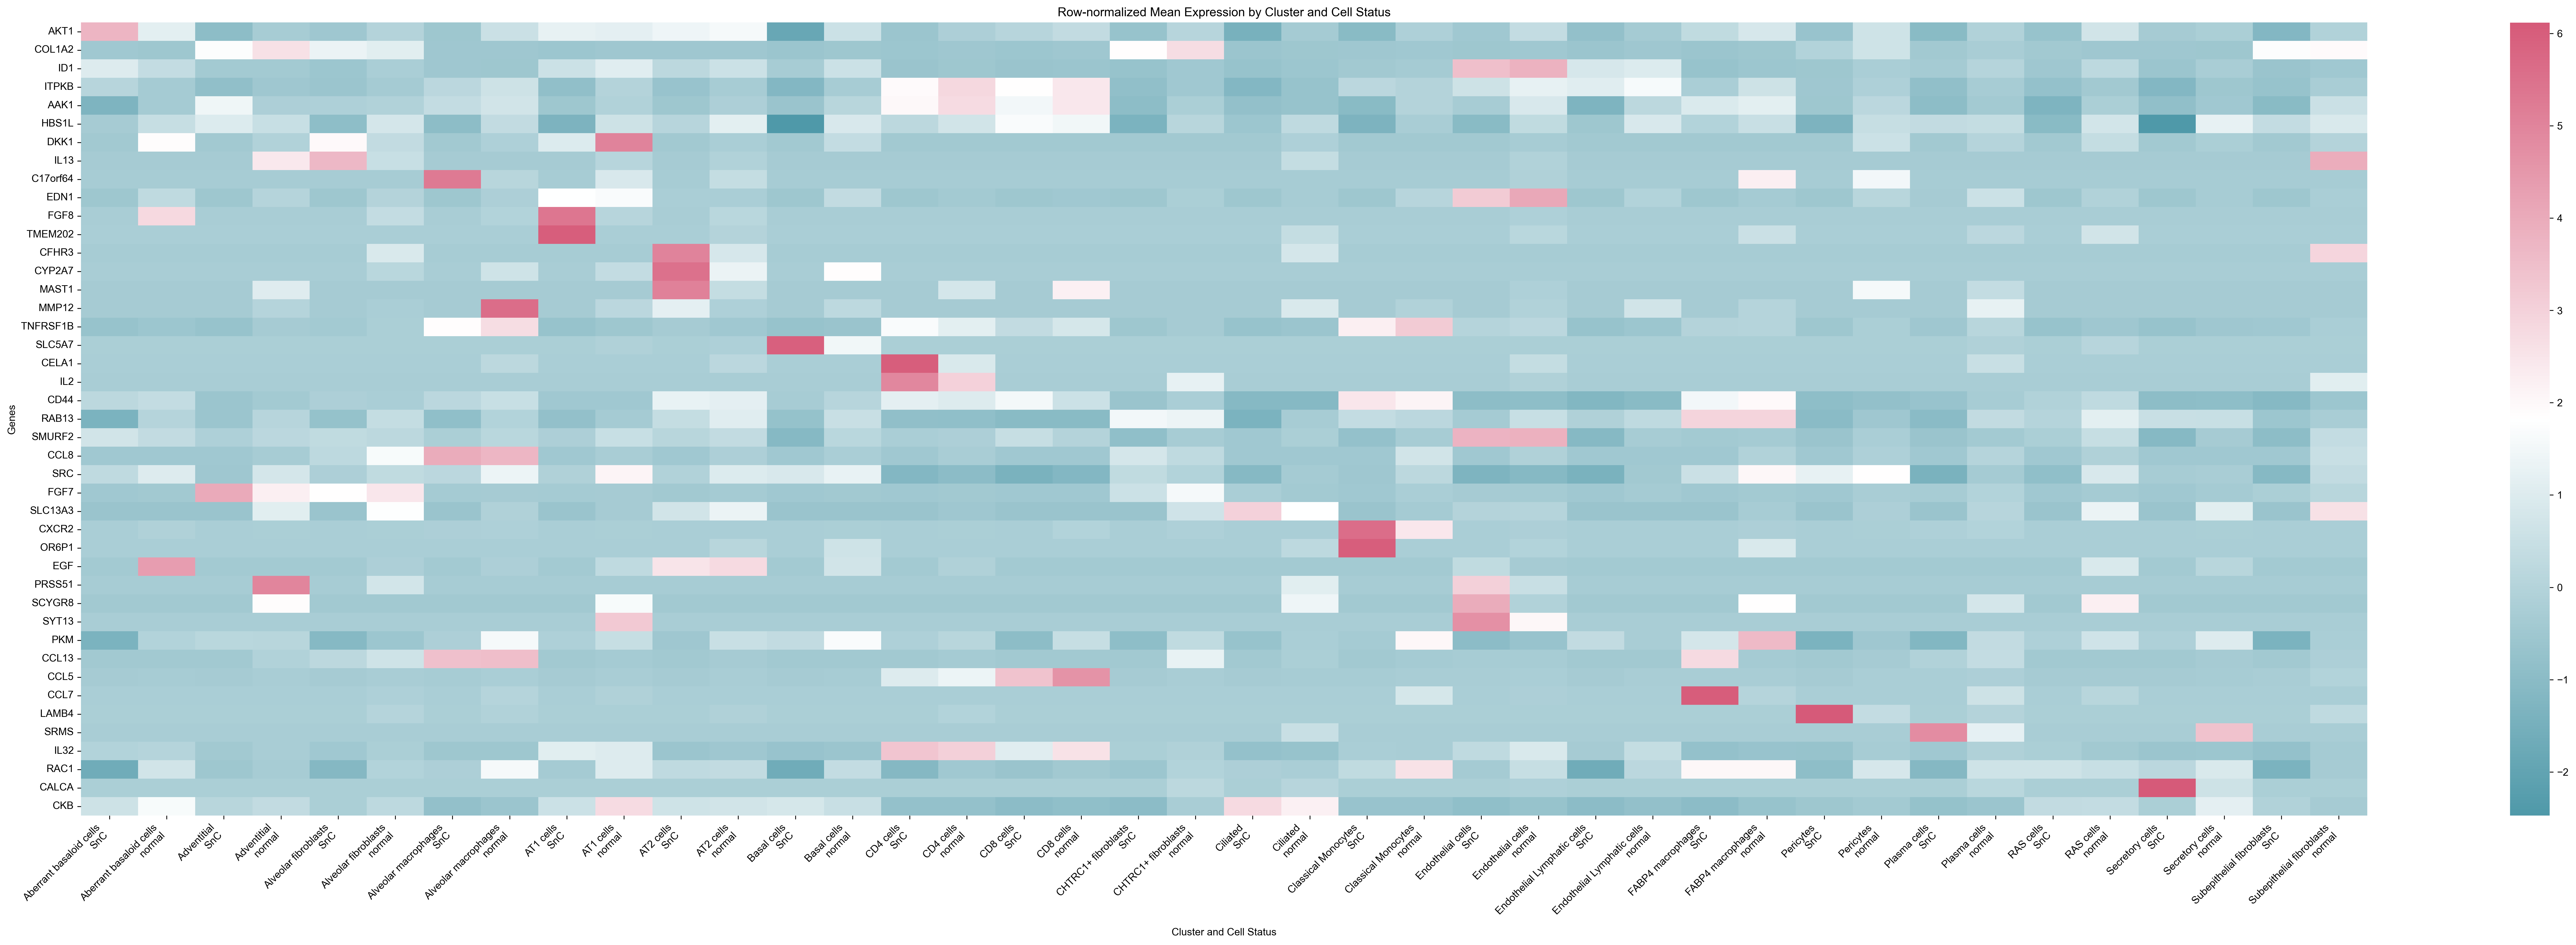

In [12]:
generate_heatmap_snc(adata,
                     table3_path="SnGs_data2_1/data1_Gene_newTable3_gene_ct_count.csv",
                     z_score=True)

In [ ]:
from plot_figure import plot_enrichment
plot_enrichment("SnGs_data2_1/data1_Gene_Table2_DEG_ct_SnG_score.csv")

In [ ]:
def create_column(row):
    if row['is_sen']=='SnC' and row["clusters"] in ["Endothelial cells",
                                                    "AT2 cells",
                                                    "Alveolar macrophages",
                                                    "Alveolar fibroblasts",
                                                    "NK cells",
                                                    "CHTRC1+ fibroblasts"
                                                   ]:
        return f'SnC_{row["clusters"]}'
    else:
        return row['clusters']
adata.obs['ct_ccc'] = adata.obs.apply(create_column, axis=1)

In [ ]:
adata.obs['ct_ccc'].value_counts()

In [ ]:
adata.obs.to_csv("./hu_data_obs_0210.csv")

In [ ]:
np.savetxt("./hu_data_0205.csv", new_adata.X.todense(), delimiter=",")

In [34]:
adata.X.todense()

matrix([[1., 0., 0., ..., 0., 5., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.]], dtype=float32)

In [37]:
np.savetxt("hu_data_0214_matrix.csv", adata.X.todense(), delimiter=",")

In [43]:
df = pd.DataFrame(adata.X.todense().T, index=adata.var.index, columns=adata.obs.index)

# Write to CSV – the index (gene names) will be included as the first column.
df.to_csv("hu_data_0214_matrix.csv")

In [24]:
sp.pp.normalize_total(adata, target_sum=1e4)
sp.pp.log1p(adata)
# 

In [26]:
adata.X.todense()

matrix([[2.297829 , 0.       , 0.       , ..., 0.       , 3.8234706,
         0.       ],
        [2.3433619, 0.       , 0.       , ..., 0.       , 2.3433619,
         0.       ],
        [2.248612 , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 3.1731794,
         0.       ]], dtype=float32)

In [27]:
sp.pp.scale(adata)

In [28]:
adata.X

array([[ 0.7175766 , -0.07067133, -0.20876335, ..., -0.14726496,
         2.010614  , -0.24794663],
       [ 0.7450381 , -0.07067133, -0.20876335, ..., -0.14726496,
         0.96170986, -0.24794663],
       [ 0.6878933 , -0.07067133, -0.20876335, ..., -0.14726496,
        -0.69895303, -0.24794663],
       ...,
       [-0.66827226, -0.07067133, -0.20876335, ..., -0.14726496,
        -0.69895303, -0.24794663],
       [-0.66827226, -0.07067133, -0.20876335, ..., -0.14726496,
        -0.69895303, -0.24794663],
       [-0.66827226, -0.07067133, -0.20876335, ..., -0.14726496,
         1.549774  , -0.24794663]], dtype=float32)

0.032484062

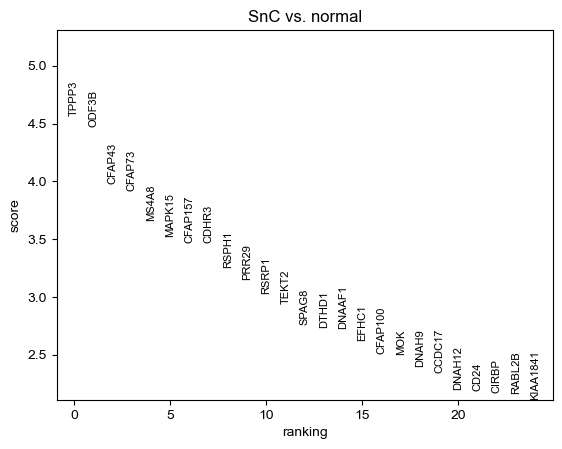

In [66]:
import scanpy as sc

# adata=new_data.copy()
sp.pp.normalize_total(adata, target_sum=1e4)
sp.pp.log1p(adata)
# Subset the data to only include 'Ciliated' cells
adata_ciliated = adata[adata.obs['clusters'] == 'Ciliated'].copy()

# Make sure that the 'is_sen' column is of categorical type 
adata_ciliated.obs['is_sen'] = adata_ciliated.obs['is_sen'].astype('category')

# Run differential expression analysis comparing 'snc' vs 'normal'
# Here, "normal" is set as the reference group. You can change the method if desired.
sc.tl.rank_genes_groups(
    adata_ciliated, 
    groupby='is_sen', 
    reference='normal', 
    method='wilcoxon'
)

# Visualize the top 25 differentially expressed genes using a dotplot or a heatmap
degs=sc.pl.rank_genes_groups(adata_ciliated, n_genes=25, sharey=False)


In [42]:
adata_ciliated.uns['rank_genes_groups']['names']

rec.array([('RSRP1',), ('STK32C',), ('DHRS9',), ..., ('TTC29',),
           ('CFAP54',), ('C11orf88',)],
          dtype=[('SnC', 'O')])

In [77]:
adata_ciliated

AnnData object with n_obs × n_vars = 803 × 15814
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X.1', 'X', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflammat

In [78]:
adata_ciliated.uns['wilcoxon']

{'params': {'groupby': 'is_sen',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('TPPP3', 'TTC29'), ('ODF3B', 'MSI2'), ('CFAP43', 'C11orf88'),
            ..., ('C11orf88', 'CFAP43'), ('MSI2', 'ODF3B'),
            ('TTC29', 'TPPP3')],
           dtype=[('SnC', 'O'), ('normal', 'O')]),
 'scores': rec.array([( 4.5701084,  2.9943736), ( 4.4739394,  2.8993995),
            ( 3.9751759,  2.7608209), ..., (-2.7608209, -3.9751759),
            (-2.8993995, -4.4739394), (-2.9943736, -4.5701084)],
           dtype=[('SnC', '<f4'), ('normal', '<f4')]),
 'pvals': rec.array([(4.87472376e-06, 2.75008954e-03),
            (7.67914964e-06, 3.73878209e-03),
            (7.03272757e-05, 5.76562945e-03), ...,
            (5.76562945e-03, 7.03272757e-05),
            (3.73878209e-03, 7.67914964e-06),
            (2.75008954e-03, 4.87472376e-06)],
           dtype=[('SnC', '<f8'), ('normal', '<f8')]),
 'pval

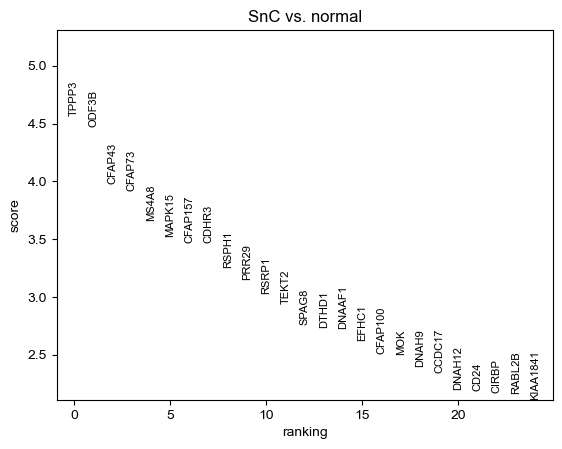

gene     p_val      logFC  p_val_adj
15707    UBE2E3  0.132260 -28.305258        1.0
15694      ARSA  0.141075 -28.237984        1.0
15634     TRIQK  0.180896 -28.161997        1.0
15635      EGFR  0.180896 -28.124973        1.0
15633      UACA  0.180896 -28.120274        1.0
...         ...       ...        ...        ...
1225       MPP4  0.823458  25.709505        1.0
1206       KRT1  0.823458  25.709988        1.0
1229      PKHD1  0.823458  25.720858        1.0
1214      DPPA2  0.823458  25.778641        1.0
551    NDUFA4L2  0.655453  26.602093        1.0

[15814 rows x 4 columns]

In [81]:
adata_ciliated_1 = adata[adata.obs['clusters'] == 'Ciliated'].copy()
adata_ciliated_1.obs['is_sen'] = adata_ciliated_1.obs['is_sen'].astype('category')
sc.tl.rank_genes_groups(adata_ciliated_1, groupby='is_sen', 
                        groups=['SnC'], reference='normal',
                        method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata_ciliated_1, n_genes=25, sharey=False, key="wilcoxon")

degs = pd.DataFrame({
            'gene': adata_ciliated_1.uns['wilcoxon']['names']['SnC'],
            'p_val': adata_ciliated_1.uns['wilcoxon']['pvals']['SnC'],
            'logFC': adata_ciliated_1.uns['wilcoxon']['logfoldchanges']['SnC'],
            'p_val_adj': adata_ciliated_1.uns['wilcoxon']['pvals_adj']['SnC']
        })
        
degs=degs.sort_values(by='logFC')
degs

For AT1 cells, processing library: KEGG_2021_Human
	Results saved to enrichr_results/enrichment_AT1 cells_KEGG_2021_Human.csv
	Barplot saved to enrichr_results/barplot_AT1 cells_KEGG_2021_Human.png
For AT1 cells, processing library: GO_Biological_Process_2023
	Results saved to enrichr_results/enrichment_AT1 cells_GO_Biological_Process_2023.csv
	Barplot saved to enrichr_results/barplot_AT1 cells_GO_Biological_Process_2023.png
For AT1 cells, processing library: GO_Cellular_Component_2023
	Results saved to enrichr_results/enrichment_AT1 cells_GO_Cellular_Component_2023.csv
	Barplot saved to enrichr_results/barplot_AT1 cells_GO_Cellular_Component_2023.png
For AT1 cells, processing library: GO_Molecular_Function_2023
	Results saved to enrichr_results/enrichment_AT1 cells_GO_Molecular_Function_2023.csv
	Barplot saved to enrichr_results/barplot_AT1 cells_GO_Molecular_Function_2023.png
For AT2 cells, processing library: KEGG_2021_Human
	Results saved to enrichr_results/enrichment_AT2 cells_KEG

In [126]:
selected_ct_withidexs=[]
for i in selected_ct:
    for j in row_numbers_by_category.keys():
        t=j.split(': ')[1]
        if i==t:
            selected_ct_withidexs.append(j)
selected_ct,selected_ct_withidexs            

(['Endothelial cells',
  'AT2 cells',
  'Alveolar macrophages',
  'Alveolar fibroblasts',
  'CD4 cells',
  'Plasma cells',
  'AT1 cells',
  'SMC',
  'Classical Monocytes',
  'Ciliated',
  'Subepithelial fibroblasts',
  'NK cells',
  'CD8 cells',
  'SPP1 macrophages',
  'CTHRC1+ fibroblasts',
  'Pericytes',
  'Adventitial',
  'RAS cells',
  'Secretory cells',
  'FABP4 macrophages',
  'Basal cells',
  'Mast cells',
  'B cells'],
 ['14: Endothelial cells',
  '1: AT2 cells',
  '5: Alveolar macrophages',
  '4: Alveolar fibroblasts',
  '8: CD4 cells',
  '19: Plasma cells',
  '0: AT1 cells',
  '21: SMC',
  '12: Classical Monocytes',
  '11: Ciliated',
  '25: Subepithelial fibroblasts',
  '17: NK cells',
  '9: CD8 cells',
  '22: SPP1 macrophages',
  '10: CTHRC1+ fibroblasts',
  '18: Pericytes',
  '3: Adventitial',
  '20: RAS cells',
  '23: Secretory cells',
  '15: FABP4 macrophages',
  '7: Basal cells',
  '16: Mast cells',
  '6: B cells'])

In [127]:
len(selected_ct_withidexs)

23

In [131]:
def saveUmapPlots(embedding, row_numbers, clusters=None, reduce=False, labels=None, colored_celltypes=None):
    # If using a tensor, ensure embedding is on CPU and detached.
    # Optionally reduce the embedding dimensions using UMAP.
    if reduce:
        reducer = umap.UMAP()
        embedding = reducer.fit_transform(embedding)
    
    # Define color maps (if needed later for other plotting)
    cmap1 = matplotlib.cm.get_cmap('tab20')        
    cmap2 = matplotlib.cm.get_cmap('Set3')  
    color_ls = cmap1.colors + cmap2.colors
    color_count = 0

    # If no clusters are provided, simply create one plot.
    if clusters is None:
        fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
        ax.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=5)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.tight_layout()
        plt.savefig("embedding.png", bbox_inches="tight")
        plt.close(fig)
    else:
        # Loop over each cluster and its corresponding label.
        for cluster, label in zip(clusters, labels):
            # Only process cell types that are in colored_celltypes, if provided.
            if colored_celltypes is None or label in colored_celltypes:
                # Filter row_numbers that are present in this cluster.
                celltyp_row_numbers = [i for i in row_numbers if i in cluster]
                
                # Create a new figure for this cell type.
                fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
                # Plot all points in the cluster in a light gray background.
                ax.scatter(embedding[cluster, 0], embedding[cluster, 1], s=2, color='#cccccc')
                # Overlay the points corresponding to the cell type in red.
                ax.scatter(embedding[celltyp_row_numbers, 0], embedding[celltyp_row_numbers, 1], s=2, color="red")
                # Set the title to include the cell type and count info.
                ax.set_title(f"{label} ({len(celltyp_row_numbers)}/{len(cluster)})", fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.tight_layout()
                
                # Save the figure with a file name based on the cell type.
                plt.savefig(f"{label}.png", bbox_inches="tight")
                plt.close(fig)
                
row_numbers = row_numbers_by_category['24: SnC']   
colored_celltypes = selected_ct_withidexs
 
saveUmapPlots(adata.obsm['X_umap'], row_numbers,
              clusters=list(row_numbers_by_category.values()),
              labels=list(row_numbers_by_category.keys()),
              colored_celltypes=colored_celltypes)


/tmp/ipykernel_2560682/558832834.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = matplotlib.cm.get_cmap('tab20')
/tmp/ipykernel_2560682/558832834.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = matplotlib.cm.get_cmap('Set3')


/tmp/ipykernel_2560682/2250540828.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = matplotlib.cm.get_cmap('tab20')
/tmp/ipykernel_2560682/2250540828.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = matplotlib.cm.get_cmap('Set3')


IndexError: index 2 is out of bounds for axis 0 with size 2

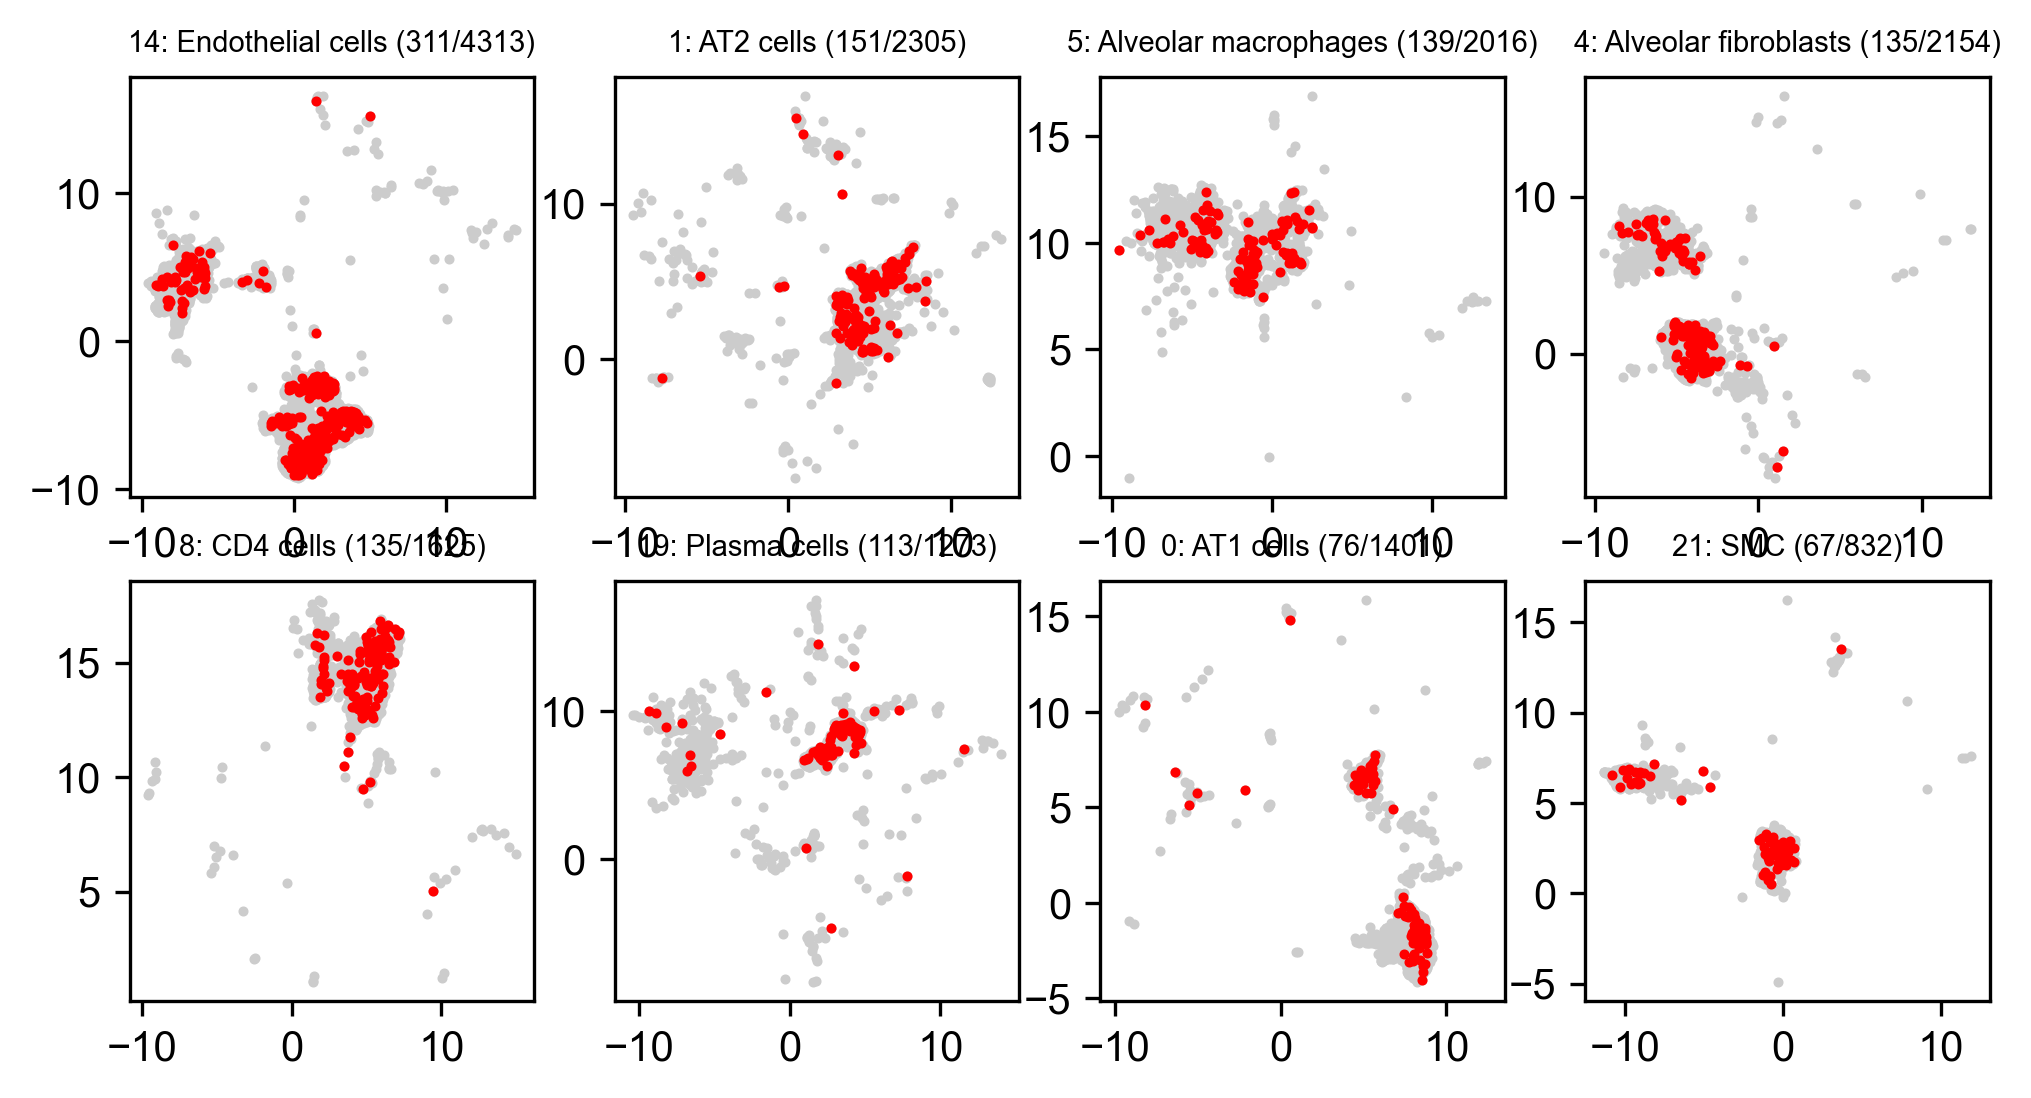

In [128]:
def subUmapPlot(embedding,row_numbers,clusters=None,reduce=False,labels=None,colored_celltypes=None):
    # if tensor: embedding should be .cpu().detach()
    # clusters: Nxt
    # t里面存的是行的index
    if reduce:
        reducer = umap.UMAP()
        embedding = reducer.fit_transform(embedding)
    
    fig, axes = plt.subplots(2, 4, sharex=False, sharey=False,figsize=(8,4),dpi=300)
    
    cmap1 = matplotlib.cm.get_cmap('tab20')        
    cmap2 = matplotlib.cm.get_cmap('Set3')  
    color_ls=cmap1.colors+cmap2.colors
    color_count=0
    
    if clusters is None:
        plt.scatter(embedding[:,0],embedding[:,1],alpha=0.5,s=5)
    else:
        x_s=[]
        y_s=[]
        label_s=[]
        count=0
        for cluster,label in zip(clusters,labels):
            if colored_celltypes is not None and label in colored_celltypes:
                celltyp_row_numbers=[]
                for i in row_numbers:
                    if i in cluster:
                        celltyp_row_numbers.append(i)
                        
#                 axes[int(count/4),count%4].scatter(embedding[cluster,0],embedding[cluster,1],s=2,color=color_ls[color_count])
                axes[int(count/4),count%4].scatter(embedding[cluster,0],embedding[cluster,1],s=2,color='#cccccc')

                color_count+=1
                axes[int(count/4),count%4].scatter(embedding[celltyp_row_numbers,0],embedding[celltyp_row_numbers,1],s=2,color="red")
                axes[int(count/4),count%4].set_title(f"{label} ({len(celltyp_row_numbers)}/{len(cluster)})",fontsize=7)
                # axes[int(count/4),count%4].spines['right'].set_visible(False)
                # axes[int(count/4),count%4].spines['top'].set_visible(False)
                
                count+=1
#     axes[1, 3].axis('off')
#     axes[1, 2].axis('off')

    plt.setp(fig.axes, yticks=[],xticks=[])
    plt.tight_layout()
    
def subUmapPlot1(embedding, row_numbers, clusters=None, reduce=False, labels=None, colored_celltypes=None):
    # if tensor: embedding should be .cpu().detach()
    # clusters: Nxt
    # t里面存的是行的index
    if reduce:
        reducer = umap.UMAP()
        embedding = reducer.fit_transform(embedding)
    
    fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(8, 4), dpi=300)
    
    cmap1 = matplotlib.cm.get_cmap('tab20')        
    cmap2 = matplotlib.cm.get_cmap('Set3')  
    color_ls = cmap1.colors + cmap2.colors
    color_count = 0

    if clusters is None:
        plt.scatter(embedding[:,0], embedding[:,1], alpha=0.5, s=5)
    else:
        count = 0
        for label in colored_celltypes:
            celltyp_row_numbers = []
            cluster = clusters[labels.index(label)]
            for i in row_numbers:
                if i in cluster:
                    celltyp_row_numbers.append(i)
            
            ax = axes[int(count / 4), count % 4]
            ax.scatter(embedding[cluster, 0], embedding[cluster, 1], s=2, color='#cccccc')
            ax.scatter(embedding[celltyp_row_numbers, 0], embedding[celltyp_row_numbers, 1], s=2, color="red")
            ax.set_title(f"{label} ({len(celltyp_row_numbers)}/{len(cluster)})", fontsize=7)
            
            color_count += 1
            count += 1
    
    plt.setp(fig.axes, yticks=[], xticks=[])
    plt.tight_layout()
    
row_numbers=row_numbers_by_category['24: SnC']   
colored_celltypes=selected_ct_withidexs
 
subUmapPlot1(adata.obsm['X_umap'],row_numbers,
            clusters=list(row_numbers_by_category.values()),labels=list(row_numbers_by_category.keys()),colored_celltypes=colored_celltypes)
plt.show()

ValueError: 'Endothelial cells' is not in list

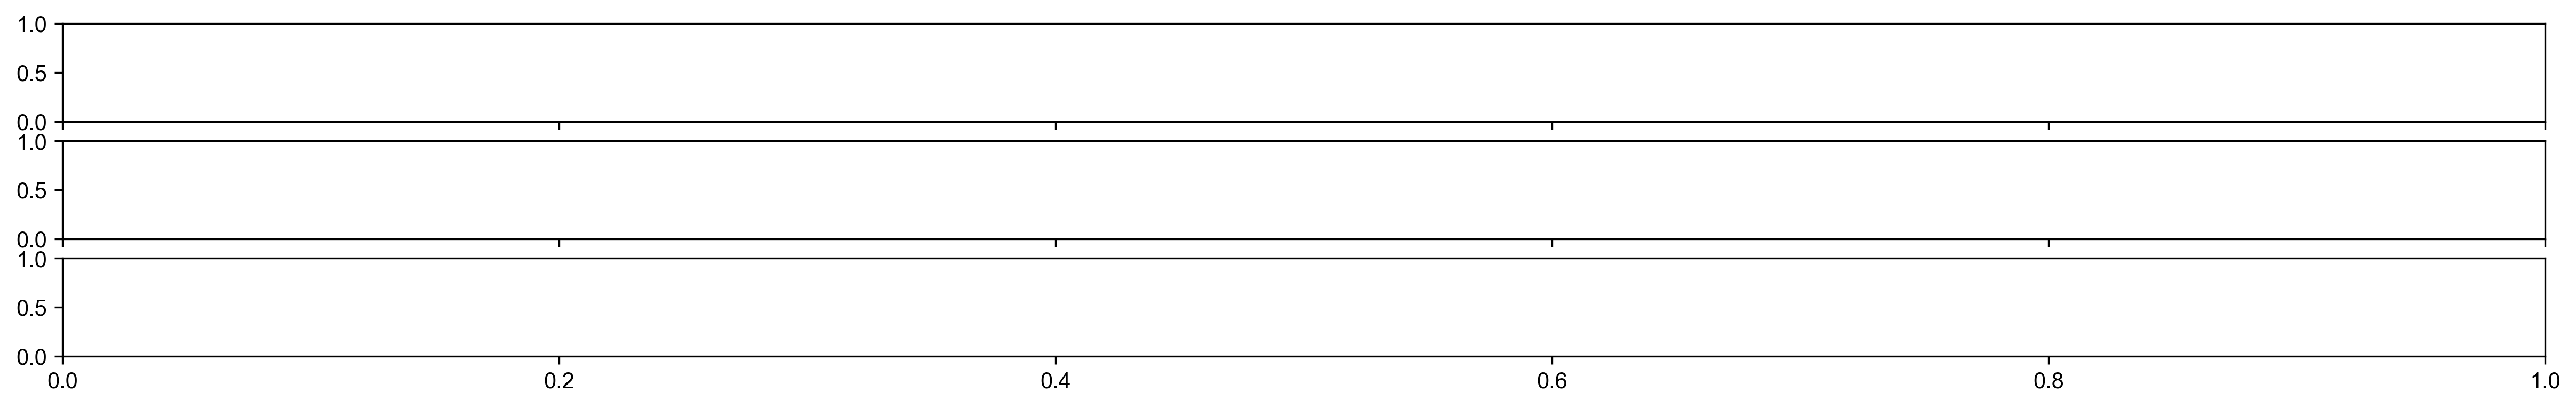

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scanpy as sc

# Load or preprocess your AnnData object (adata)
# adata = sc.read('your_file.h5ad')

# Assuming 'adata' is already loaded and preprocessed

# Create a figure with three subplots, sharing the x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 2.7), dpi=300, sharex=True)

# First subplot
value_counts = adata.obs["clusters"].value_counts()
log_value_counts = np.log10(value_counts)
data = {
    'Cell Type': list(log_value_counts.index),
    'Value': list(log_value_counts.values)
}

# Create a DataFrame
df = pd.DataFrame(data)

# The desired order
desired_order = [
    'AT1', 'AT2', 'AT2 transitional', 'Adventitial fibroblasts', 'Alveolar fibroblasts', 'Alveolar macrophages',
    'B cells', 'Basal', 'CD4+ T Cells', 'CD8+ T Cells', 'Ciliated', 'Dendritic cells', 'EC Arterial',
    'EC General capillary', 'EC Lymphatic', 'EC Venous', 'Fibrotic fibroblast', 'Goblet', 'Inflammatory fibroblasts',
    'KRT5-/KRT17+ cells', 'MUC5B+ club', 'Mast cells', 'Monocyte', 'Monocyte-derived macrophage', 'NK cells',
    'Peribronchial fibroblasts', 'Pericyte', 'Plasma cells', 'Proliferating fibroblasts', 'SCGB3A2+/SCGB1A1+ club',
    'SPP1+ macrophages', 'Smooth muscle cells'
]

# Reorder the DataFrame
df['Order'] = df['Cell Type'].apply(lambda x: desired_order.index(x))
df = df.sort_values('Order').drop('Order', axis=1).reset_index(drop=True)

df.plot(kind="bar", color="grey", rot=0, ax=ax1)
# ax1.set_ylabel("Log10\nNo. of cells")
ax1.set_xlabel("")
ax1.set_xticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Second subplot
adata.obs['gene_counts'] = (adata.X > 0).sum(axis=1)
plot_data = pd.DataFrame({
    'cell_type': adata.obs['clusters'],
    'gene_counts': adata.obs['gene_counts']
})

cmap1 = matplotlib.cm.get_cmap('tab20')        
cmap2 = matplotlib.cm.get_cmap('Set3')  
cmap3 = matplotlib.cm.get_cmap('Set1') 
cmap4 = matplotlib.cm.get_cmap('Set2') 
color_ls=cmap1.colors+cmap2.colors+cmap3.colors+cmap4.colors


sns.boxplot(x='cell_type', y='gene_counts', palette=color_ls,data=plot_data, ax=ax2,order=desired_order)
ax2.set_xlabel('Cell Type')
ax2.set_ylabel('')
# ax2.set_ylabel('Number of Genes Expressed')
# ax2.set_title('Gene Counts per Cell Type')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Third subplot
grouped = adata.obs.groupby(['clusters', 'Status']).size().reset_index(name='count')
pivot_table = grouped.pivot_table(values='count', index='clusters', columns='Status', fill_value=0)
percentage_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
percentage_table.reset_index(inplace=True)
percentage_table.columns.name = None
percentage_table.rename(columns={'clusters': 'cell type'}, inplace=True)
pivot_table['total'] = pivot_table.sum(axis=1).astype("string")
pivot_table.reset_index(inplace=True)
percentage_table['cell type'] = percentage_table['cell type'] + " (" + pivot_table['total'] + ")"
percentage_table.plot(x='cell type', kind='bar', stacked=True, ax=ax3, mark_right=True,color=["#83a8cb","#b14e3f"])
# ax3.set_xticks(range(len(percentage_table['cell type'])))
ax3.set_xticklabels([], rotation=0)
ax3.set_xticks(list(range(33)),list(range(33)))

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.get_legend().remove()

# Adjust the layout
plt.tight_layout()

# Show the combined figure
plt.show()


In [35]:
percentage_table.to_csv("./1.csv")

In [46]:
ls_g=utils.load_markers(args)
ls_g1=list(set([j for i in ls_g for j in i]))
ls_g.append(ls_g1)

各marker list所包含的gene数：
  SenMayo    FRIDMAN    CellAge    Cell Cycle Markers
---------  ---------  ---------  --------------------
      125         77        144                    11


In [48]:
pd.DataFrame(ls_g,index=['SenMayo','Fridman','CellAge','Cell cycle','Combined']).T.to_csv('1.csv')

In [149]:
plot_data

cell_type  \
WL_20146_AAACAAGCAGTAATACATACGTCA-1     Monocyte-derived macrophage   
WL_20146_AAACCAGGTTAGGCGGATACGTCA-1                             AT2   
WL_20146_AAACGGGCAAGCCACGATACGTCA-1               SPP1+ macrophages   
WL_20146_AAACGTTCAACAAGTTATACGTCA-1                             AT2   
WL_20146_AAACTGTCAGAAACTTATACGTCA-1               SPP1+ macrophages   
...                                                             ...   
OSU10161_LL_TTTGAGAAGCAAGTTAATGTTGAC-1                       Goblet   
OSU10161_LL_TTTGCGGGTCCGCTAAATGTTGAC-1          Smooth muscle cells   
OSU10161_LL_TTTGCGGGTGGTTCTGATGTTGAC-1       SCGB3A2+/SCGB1A1+ club   
OSU10161_LL_TTTGCTGAGTCTTGCAATGTTGAC-1       SCGB3A2+/SCGB1A1+ club   
OSU10161_LL_TTTGGCGGTATATTCGATGTTGAC-1                 Plasma cells   

                                        gene_counts  
WL_20146_AAACAAGCAGTAATACATACGTCA-1             166  
WL_20146_AAACCAGGTTAGGCGGATACGTCA-1              92  
WL_20146_AAACGGGCAAGCCACGATACGTCA-1             111  
WL_20146_AAACGTTCAACAAGTTATACGTCA-1              65  
WL_20146_AAACTGTCAGAAACTTATACGTCA-1              77  
...                                             ...  
OSU10161_LL_TTTGAGAAGCAAGTTAATGTTGAC-1          148  
OSU10161_LL_TTTGCGGGTCCGCTAAATGTTGAC-1           77  
OSU10161_LL_TTTGCGGGTGGTTCTGATGTTGAC-1           79  
OSU10161_LL_TTTGCTGAGTCTTGCAATGTTGAC-1           79  
OSU10161_LL_TTTGGCGGTATATTCGATGTTGAC-1           53  

[24125 rows x 2 columns]

In [151]:
plot_data.groupby("cell_type")["gene_counts"].sum().reset_index().to_csv('1.csv')

In [148]:
pivot_table.to_csv('1.csv')

In [16]:
adata.obs['is_sen'].value_counts()

normal    23390
SnC         735
Name: is_sen, dtype: int64

In [17]:
adata.obs.Injury.value_counts(),adata.obs.is_sen.value_counts(),adata.obs[adata.obs['is_sen']=='SnC'].Injury.value_counts()

(IPF    17543
 NI      6582
 Name: Injury, dtype: int64,
 normal    23390
 SnC         735
 Name: is_sen, dtype: int64,
 IPF    670
 NI      65
 Name: Injury, dtype: int64)

In [153]:
sub_sencells

View of AnnData object with n_obs × n_vars = 735 × 2395
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflammatory.f

In [154]:
sen_gene_ls

tensor([15691, 15635, 15742, 15707, 15565, 15559, 15696, 15737, 15835, 15750,
        15593, 15728, 15677, 15579,  1156, 15755, 15611, 15692, 15818, 15642,
        15673, 15807, 15806, 15663, 15725, 15603, 15577, 15724, 15614, 15814,
        15810, 15644, 15658, 15704, 15825, 15697, 15627, 15824, 15598, 15760,
        15774, 15640, 15637, 15695, 15699, 15634, 15583, 15698, 15605, 15709,
        15767, 15782, 15659, 15599, 15772, 15756, 15726, 15576, 15708, 15802,
        15743, 15668, 15766, 15727, 15711, 15615, 15751, 15798, 15768, 15687,
        15827, 15617, 15733, 15618, 15812, 15739, 15580, 15764, 15573, 15838,
        13493, 15839, 15550, 15660,  8621, 15831, 15645, 15666, 15703,  5986,
        15722, 15636, 15741, 15586, 15721, 15557, 15693, 15784, 15800, 15816,
        15829, 15785, 15679, 15817,  3348,  1856, 15830, 15754, 15729, 15736,
        15787, 15688, 15790, 15567, 15619, 15625, 15720, 15770, 15649, 15833,
         4955, 15632, 15740, 12871, 15656, 15653, 15556, 15643, 

In [34]:
sen_gene_names=[new_data.var.index[i] for i in sen_gene_ls]

In [35]:
sen_gene_names

['CCL13',
 'PRPF19',
 'GADD45A',
 'GPR37L1',
 'ETS1',
 'IQGAP2',
 'MVK',
 'TNFRSF1B',
 'CXCR2',
 'SMPD1',
 'ZFP36',
 'SFN',
 'SUPT5H',
 'FILIP1L',
 'CCN2',
 'PEX19',
 'CCL20',
 'CSF1',
 'PIK3R5',
 'MAP3K7',
 'CYP1B1',
 'TNFRSF1A',
 'CCL3',
 'EHF',
 'NFE2L2',
 'NAP1L4',
 'E2F1',
 'IL10',
 'SERPINB4',
 'MAP2K7',
 'IL6',
 'DPY30',
 'CCL7',
 'EWSR1',
 'UBTD1',
 'CDK6',
 'STK32C',
 'FAS',
 'PDIK1L',
 'TYK2',
 'CCL5',
 'CSF2',
 'IGFBP5',
 'CLTB',
 'PPM1D',
 'SERPINE1',
 'LIMK1',
 'BCL6',
 'MAP2K6',
 'NADK',
 'ITPKA',
 'TIMP2',
 'RBP2',
 'MAP1LC3B',
 'GSN',
 'NDN',
 'RUNX1',
 'RAC1',
 'ETS2',
 'F3',
 'TERF2',
 'TES',
 'LCP1',
 'VEGFA',
 'CCL2',
 'TRIM28',
 'MOB3A',
 'FN1',
 'PROX1',
 'RAB5B',
 'STAT5B',
 'ICAM1',
 'MATK',
 'CXCL12',
 'EDN1',
 'CREG1',
 'BRAF',
 'MMP1',
 'IL7',
 'TP53',
 'RGL2',
 'PTBP1',
 'TFAP4',
 'JUN',
 'IL4',
 'SERPINE2',
 'PTGES',
 'CDK18',
 'MYC',
 'CDKN1A',
 'PECAM1',
 'TGFB1I1',
 'IFNG',
 'MCRS1',
 'PAK4',
 'EIF2S2',
 'SOD1',
 'TACC3',
 'CRYAB',
 'CTNNB1',
 'AXL',
 'I

In [157]:
len(sen_gene_names)

284

In [39]:
new_data.obs['clusters']=new_data.obs['ct']

/tmp/ipykernel_478176/581083684.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  new_data.obs['clusters']=new_data.obs['ct']


In [38]:
def identify_sengene_v2(new_data,
                        sencell_dict):
    # prepare adata for deg
    adata_deg=new_data.copy()
    sp.pp.normalize_total(adata_deg, target_sum=1e4)
    sp.pp.log1p(adata_deg)
    sp.pp.scale(adata_deg)

    # selected_ct=['Fibrotic fibroblast',
    #  'EC Venous',
    #  'CD4+ T Cells',
    #  'Plasma cells',
    #  'AT2',
    #  'Smooth muscle cells',
    #  'EC General capillary',
    #  'Dendritic cells']
    
    #use global selected_ct
    
    sencell_indexs=list(sencell_dict.keys())
    
    sencell_indexs_updated=[]
    for i in sencell_indexs:
        ct=adata.obs.iloc[i-new_data.shape[1]].clusters
        if ct in selected_ct:
            sencell_indexs_updated.append(i)
            
    sencell_indexs=sencell_indexs_updated
    
    # create SnC column
    row_indices= np.array(sencell_indexs)-new_data.shape[1]
    new_column = np.array(['normal']*new_data.shape[0])
    new_column[row_indices] = 'SnC'
    adata_deg.obs['is_sen'] = new_column
    adata_deg.obs['is_sen']=adata_deg.obs['is_sen'].astype(str).astype('category')
    # Verify the result
    # print(adata_deg.obs['is_sen'])
    
    cell_types = adata_deg.obs['clusters'].unique()
    
    all_genes_names=list(new_data.var.index)
    results_genes=[]
    deg_results={}
    deg_results_full={}
    
    for cell_type in cell_types:
        adata_deg_sub=adata_deg[adata_deg.obs['clusters']==cell_type]
        if 'SnC' in adata_deg_sub.obs['is_sen'].values:
            value_counts = adata_deg_sub.obs['is_sen'].value_counts()
            # 只考虑老化细胞数大于5的cell type
            if value_counts['SnC']<=5:
                continue
                
            sp.tl.rank_genes_groups(adata_deg_sub, groupby='is_sen', groups=['SnC'], 
                                    reference='normal', method='wilcoxon')

            # Extract the results into a DataFrame
            degs = pd.DataFrame({
                'gene': adata_deg_sub.uns['rank_genes_groups']['names']['SnC'],
                'p_val': adata_deg_sub.uns['rank_genes_groups']['pvals']['SnC'],
                'logFC': adata_deg_sub.uns['rank_genes_groups']['logfoldchanges']['SnC'],
                'p_val_adj': adata_deg_sub.uns['rank_genes_groups']['pvals_adj']['SnC']
            })
            
            degs=degs.sort_values(by='logFC')
            
            deg_results_full[cell_type]=degs
            num=len(degs)
            print(f'Get {num} degs!')
    return deg_results_full


deg_results_full=identify_sengene_v2(new_data.copy(),
                        sencell_dict)  

/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Get 15814 degs!
Get 15814 degs!


/home/chenghao/.conda/envs/sencell_env/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [41]:
ct_sencell_indexs={}

row_numbers=np.array(sencell_indexs)-new_data.shape[1]
for i in row_numbers:
    ct_=new_data.obs.iloc[i]['clusters']
    if ct_ in ct_sencell_indexs:
        ct_sencell_indexs[ct_].append(i)
    else:
        ct_sencell_indexs[ct_]=[i]

ct_sencell_indexs.keys()

dict_keys(['AT2 cells', 'Alveolar macrophages', 'AT1 cells', 'Alveolar fibroblasts', 'Endothelial cells', 'CD4 cells', 'CHTRC1+ fibroblasts', 'Plasma cells'])

In [60]:
for key,value in ct_sencell_indexs.items():
    print(key,len(value))

AT2 cells 151
Alveolar macrophages 139
AT1 cells 76
Alveolar fibroblasts 135
Endothelial cells 311
CD4 cells 135
CHTRC1+ fibroblasts 39
Plasma cells 113


In [43]:
new_data

AnnData object with n_obs × n_vars = 24125 × 15814
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'X.1', 'X', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflamm

In [61]:
names_ls=list(new_data.var_names)
names_ls_1=list(adata.var_names)
high_gene_indexs=[names_ls.index(i) for i in names_ls_1]

In [45]:
def identify_sengene_v3(sencell_dict,gene_cell,edge_index_selfloop,attention_scores,
                        sen_gene_ls,ct_sencell_indexs):
    attention_scores=attention_scores.detach().to('cpu')
    edge_index_selfloop=edge_index_selfloop.detach().to('cpu')

    num_genes = gene_cell.shape[0]
    num_cells = gene_cell.shape[1]
    cell_mask_template = torch.zeros(num_genes + num_cells, dtype=torch.bool)

    gene_scores=[]
    for gene_index in range(num_genes):
        if gene_index %1000==0:
            print(gene_index)
        if gene_index in sen_gene_ls or gene_index in high_gene_indexs:
            # 保存一个基因在8个ct的snc上的score
            ct_scores=[]
            for key,value in ct_sencell_indexs.items():
                cell_index=value
                cell_index=torch.tensor(cell_index)
                
                cell_mask = cell_mask_template.clone()
                cell_mask[cell_index] = True
                
                connected_cells=edge_index_selfloop[0][edge_index_selfloop[1] == gene_index]
                
                if len(connected_cells[cell_mask[connected_cells]])==0:
                    ct_scores.append(torch.tensor(0))
                    # print(f'no sencell in this gene {gene_index}')
                else:
                    # print('caculate attention')
                    tmp=attention_scores[edge_index_selfloop[1] == gene_index]
                    attention_edge=torch.sum(tmp[cell_mask[connected_cells]],axis=1)
                    #cell_mask_normal=~cell_mask
                    #attention_edge_normal=torch.sum(attention_scores[edge_index_selfloop[1] == gene_index][cell_mask_normal[connected_cells]],axis=1)
                    #print(cell_mask,cell_mask_normal)
                    # print(attention_edge,attention_edge_normal)
                    attention_s=torch.mean(attention_edge)
                    #attention_normal=torch.mean(attention_edge_normal)
                    
                    #attention_s=attention_s-attention_normal
                    # print(attention_s)
                    ct_scores.append(torch.tensor(0.1))

            # 只计算老化基因还是对所有基因
            # if gene_index in sen_gene_ls:
            #     # print("sng:",attention_s)
            #     gene_scores.append(ct_scores)
            gene_scores.append(ct_scores)
        else:
            gene_scores.append([torch.tensor(0)]*8)
        
    return gene_scores

gene_scores=identify_sengene_v3(
        sencell_dict,new_data.X.T,edge_index_selfloop,attention_scores,sen_gene_ls,ct_sencell_indexs)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [46]:
import seaborn as sns

In [47]:
ct_sencell_indexs.keys()

dict_keys(['AT2 cells', 'Alveolar macrophages', 'AT1 cells', 'Alveolar fibroblasts', 'Endothelial cells', 'CD4 cells', 'CHTRC1+ fibroblasts', 'Plasma cells'])

In [48]:
gene_scores=torch.tensor(gene_scores)

In [49]:
filtered_gene_scores=[]
filtered_gene_names=[]
for i in range(gene_scores.shape[0]):
    if torch.sum(gene_scores[i])!=0:
        filtered_gene_names.append(new_data.var.index[i])
        filtered_gene_scores.append(gene_scores[i])
        
filtered_gene_scores=torch.stack(filtered_gene_scores)

In [67]:
torch.sum(gene_scores)

tensor(1334.)

In [51]:
def calculate_outliers(scores):
    counts=0
    snc_index=[]

    scores_ls=[]
    
    Q1 = np.percentile(scores, 25)
    Q3 = np.percentile(scores, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for i,score in enumerate(scores): 
        if score > upper_bound:
            counts+=1
            snc_index.append(i)
            scores_ls.append(score)
    
    return counts,snc_index,scores_ls

gene_deepsas={}

gene_names=list(new_data.var_names)
gene_names_sub=[gene_names[i] for i in sen_gene_ls]

for i,(key,value) in enumerate(ct_sencell_indexs.items()):
    scores=filtered_gene_scores[:,i]
    counts,sng_index,scores_ls=calculate_outliers(scores)
    # 计算在每个cluster里面有多少离群gene
    # 就是table1
    print(key,counts)
    sng_names=[[filtered_gene_names[i],float(scores_ls[j])] for j,i in enumerate(sng_index)]
    gene_deepsas[key]=sng_names

AT2 cells 0
Alveolar macrophages 0
AT1 cells 0
Alveolar fibroblasts 0
Endothelial cells 0
CD4 cells 0
CHTRC1+ fibroblasts 0
Plasma cells 0


In [52]:
gene_deepsas

{'AT2 cells': [],
 'Alveolar macrophages': [],
 'AT1 cells': [],
 'Alveolar fibroblasts': [],
 'Endothelial cells': [],
 'CD4 cells': [],
 'CHTRC1+ fibroblasts': [],
 'Plasma cells': []}

In [69]:
sen_gene_ls

tensor([15589, 11423, 15731,  9042, 15553, 15751, 15583, 15710, 15783, 15756,
        15753, 15598, 15526, 15688, 15782, 15518, 15720,  4820, 15556, 15641,
        15659, 15657, 15766, 15804,  1605, 15673, 15624, 15656, 15543, 15706,
        15577, 15681,  2560, 15519,  1852, 15587, 15650, 15714, 15534, 15750,
        15772, 15649, 15531, 15675, 15595, 15722, 15770, 15536, 15522, 15676,
        15611, 15585, 15697, 15547, 15516, 15678, 15639, 15559, 15668, 15651,
        15590, 15805, 15813, 15683, 15629, 15645, 15695, 15576, 15746, 15760,
        15565, 15798, 15653, 15711, 15609, 15558, 15540, 15791, 15537, 15551,
        15672, 15627, 15515, 15749,  4021, 15808, 15802, 15739, 15728, 15762,
         3343, 12535, 15541, 15552, 15618, 15669, 15568, 15786, 15620, 15699,
        15723, 15793, 15721,  2436, 15630, 15617, 15637, 15560, 15735, 15636,
        15664, 15811, 15666, 15566, 15763, 15776, 15612, 15715, 15765, 15794,
         6979, 15737, 15712, 13449, 15570, 15572, 15705, 15696, 

In [74]:
for key, value in ct_sencell_indexs.items():
    print(set(value).intersection(set(sen_gene_ls)))

set()
set()
set()
set()
set()
set()
set()
set()


In [53]:
rows = []
for cell_type, genes in gene_deepsas.items():
    for gene, score in genes:
        rows.append([cell_type, gene, score])

df1 = pd.DataFrame(rows, columns=['Cell Type', 'Gene Name', 'Score'])

In [54]:
df1.to_csv("/bmbl_data/chenghao/sencell/SnGs_data2/table1.csv",index=0)

In [62]:
filtered_degs={}
for key,value in deg_results_full.items():
    filtered_genes=value[(value['logFC']>=0.25)]['gene'].tolist()
    #print(key, filtered_genes)
    filtered_degs[key]=filtered_genes
    print(key,len(filtered_genes))

AT2 cells 6357
Alveolar macrophages 5609
Plasma cells 9600
AT1 cells 5936
Alveolar fibroblasts 7004
CD4 cells 6288
Endothelial cells 7537
CHTRC1+ fibroblasts 6073


In [63]:
results=[]
for key,value in deg_results_full.items():
    deg_results_full[key]['cell type']=key
    results.append(deg_results_full[key])

pd.concat(results).to_csv("./1.csv")

In [64]:
gene_deepsas_names={}
for key,value in gene_deepsas.items():
    gene_names=[line[0] for line in value]
    gene_deepsas_names[key]=gene_names
gene_deepsas_names

{'AT2 cells': [],
 'Alveolar macrophages': [],
 'AT1 cells': [],
 'Alveolar fibroblasts': [],
 'Endothelial cells': [],
 'CD4 cells': [],
 'CHTRC1+ fibroblasts': [],
 'Plasma cells': []}

In [65]:
# 做交集产生table 2
overlap_genes={}
for ct in selected_ct:
    ls1=set(gene_deepsas_names[ct])
    ls2=set(filtered_degs[ct])
    ls3=ls1.intersection(ls2)
    print(ct, len(ls3))
    overlap_genes[ct]=list(ls3)

Endothelial cells 0
AT2 cells 0
Alveolar macrophages 0
Alveolar fibroblasts 0
CD4 cells 0
Plasma cells 0
AT1 cells 0
CHTRC1+ fibroblasts 0


In [133]:
gene_deepsas_names.keys()

dict_keys(['Alveolar fibroblasts', 'CD4 T cells', 'AT2', 'Monocyte-derived Mph', 'Plasma cells', 'Peribronchial fibroblasts', 'Alveolar macrophages', 'Adventitial fibroblasts'])

In [134]:
table2=[]
for ct in selected_ct:
    t=deg_results_full[ct]
    t=t[t['gene'].isin(overlap_genes[ct])]
    t['cell type']=ct
    table2.append(t)

table2=pd.concat(table2)

/tmp/ipykernel_478176/3829289421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['cell type']=ct


In [ ]:
table2.to_csv("/bmbl_data/chenghao/sencell/SnGs_data2/table2.csv",index=0)

In [ ]:
new_list=[j for i in list(overlap_genes.values()) for j in i]
adata1=new_data.copy()
adata1.obs['is_sen']=adata.obs['is_sen']
adata1.X=adata1.X.todense()

In [ ]:
new_list

In [ ]:
cell_type_specific_snc_genes = []
new_list=[j for i in list(overlap_genes.values()) for j in i]
gene_list = list(set(new_list))

In [ ]:
len(gene_list)

In [ ]:
cell_types=selected_ct


adata1=new_data.copy()
adata1.obs['is_sen']=adata.obs['is_sen']
adata1.X=adata1.X.todense()
adata=adata1.copy()

cell_type_specific_snc_genes = []
min_genes = 5
max_genes = 5

# Loop over each cell type
for cell_type in cell_types:
    # Calculate the mean expression for SnC cells within the current cell type
    snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
    
    # Calculate the mean expression for normal cells within the current cell type
    normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
    
    # Calculate the mean expression for all other cells (non-SnC and SnC from other cell types)
    other_expr = adata[(adata.obs['clusters'] != cell_type) | (adata.obs['is_sen'] != 'SnC')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)

    # Calculate the differential expression (snc - normal) within the same cell type
    diff_expr = snc_expr - normal_expr

    # Select genes with high expression in snc and low expression in normal cells within the same cell type
    threshold_high = np.percentile(diff_expr, 75)  # Define your threshold for high expression in snc
    threshold_low = np.percentile(normal_expr, 25)  # Define your threshold for low expression in normal

    # Ensure genes are also lowly expressed in other cell types and cells
    specific_snc_genes = [gene_list[i] for i in range(len(gene_list)) 
                          if diff_expr[i] > threshold_high and normal_expr[i] < threshold_low and snc_expr[i] > np.percentile(other_expr, 75)]

    # Ensure genes are unique to this cell type by checking that they are not in other cell types' SnC genes
    unique_genes = []
    for gene in specific_snc_genes:
        is_unique = True
        for other_cell_type in cell_types:
            if other_cell_type != cell_type:
                other_snc_expr = adata[(adata.obs['clusters'] == other_cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index.get_loc(gene)].mean()
                if other_snc_expr > np.percentile(other_expr, 75):  # If high in other cell type SnC cells, not unique
                    is_unique = False
                    break
        if is_unique:
            unique_genes.append(gene)

    # Ensure at least 2-5 genes are selected
    if len(unique_genes) < min_genes:
        # Sort genes by differential expression and select top N
        sorted_indices = np.argsort(diff_expr)[::-1]
        for i in sorted_indices:
            if gene_list[i] not in unique_genes:
                unique_genes.append(gene_list[i])
            if len(unique_genes) >= min_genes:
                break

    unique_genes = unique_genes[:max_genes]  # Ensure no more than max_genes are selected

    # Store the result
    cell_type_specific_snc_genes.append({
        'clusters': cell_type,
        'specific_snc_genes': unique_genes
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(cell_type_specific_snc_genes)


# # Loop over each cell type
# for cell_type in cell_types:
#     # Calculate the mean expression for normal and snc cells for each gene in the list
#     normal_expr = adata[ (adata.obs['is_sen'] == 'normal')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
#     snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
#     # Calculate the differential expression (snc - normal)
#     diff_expr = snc_expr - normal_expr
#     # Select genes with high expression in snc and low expression in normal
#     threshold_high = np.percentile(diff_expr, 75)  # Define your threshold for high expression in snc
#     threshold_low = np.percentile(normal_expr, 25)  # Define your threshold for low expression in normal
#     #print(threshold_high,threshold_low)
#     specific_snc_genes = [gene_list[i] for i in range(len(gene_list)) if diff_expr[i] > threshold_high and normal_expr[i] < threshold_low]
    
#     # Store the result
#     cell_type_specific_snc_genes.append({
#         'clusters': cell_type,
#         'specific_snc_genes': specific_snc_genes
#     })

# # Convert the results to a DataFrame
# results_df = pd.DataFrame(cell_type_specific_snc_genes)


# Convert the specific_snc_genes column to a list
ls = results_df['specific_snc_genes'].values.tolist()

# Output the results
print(results_df)

ls=results_df['specific_snc_genes'].values.tolist()
updated_ls=[]
for i in ls:
    print(len(i))
    for j in i:
        if j not in updated_ls:
            updated_ls.append(j)
            

# Assuming `adata` is your AnnData object and `gene_list` is your list of genes of interest
updated_ls

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# Step 1: Extract the data
gene_list = updated_ls+['CDKN2A','CDKN1A']

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)


In [ ]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

In [ ]:
plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')

ax = plt.gca()
ylabels = ax.get_yticklabels()
highlight_genes = ['CDKN2A', 'CDKN1A']  # Specify which genes to highlight

ls1=utils.load_markers(args)
ls1=set([j for i in ls1 for j in i])

for i in gene_list:
    if i in ls1:
        highlight_genes.append(i)

for label in ylabels:
    if label.get_text() in highlight_genes:
        label.set_color('red')

plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")
plt.show()

In [192]:
gene_list

['LEPR',
 'CD34',
 'CXCL14',
 'SAMD11',
 'COL12A1',
 'IL6',
 'CSF3',
 'ESM1',
 'ASRGL1',
 'LIPG',
 'DNAJB1',
 'RND1',
 'CXCL8',
 'TACC3',
 'MT1X',
 'PDCD1',
 'SOCS1',
 'PTTG1',
 'CPNE7',
 'E2F1',
 'PEG10',
 'AKR1B1',
 'GLB1',
 'FILIP1L',
 'IGHD',
 'RGS1',
 'BPIFB1',
 'ITGA6',
 'PAPLN',
 'KRT4',
 'KCNIP2',
 'TNS4',
 'SPNS2',
 'TNFRSF9',
 'MMP9',
 'C2orf72',
 'CCL13',
 'CYP27A1',
 'CDKN2A',
 'CDKN1A']

In [193]:
# Step 1: Extract the data
gene_list = ['SFRP4',
 'LEPR',
 'CXCL14',
 'IL6',
 'C2CD4B',
 'CSF3',
 'ESM1',
 'PGC',
 'DNAJB1',
 'TMED2',
 'RND1',
 'TACC3',
 'PDCD1',
 'TBC1D7',
 'SOCS1',
 'E2F1',
 'COBL',
 'HS2ST1',
 'TMEM189',
 'IL15',
 'IGHD',
 'RGS1',
 'KCP',
 'OLIG1',
 'ELMO3',
 'RNF168',
 'NAGS',
 'SNRPF',
 'MTRF1L',
 'TNFRSF9',
 'GNG5',
 'CDKN2A',
 'CDKN1A']

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

各marker list所包含的gene数：
  SenMayo    FRIDMAN    CellAge    Cell Cycle Markers
---------  ---------  ---------  --------------------
      125         77        144                    11


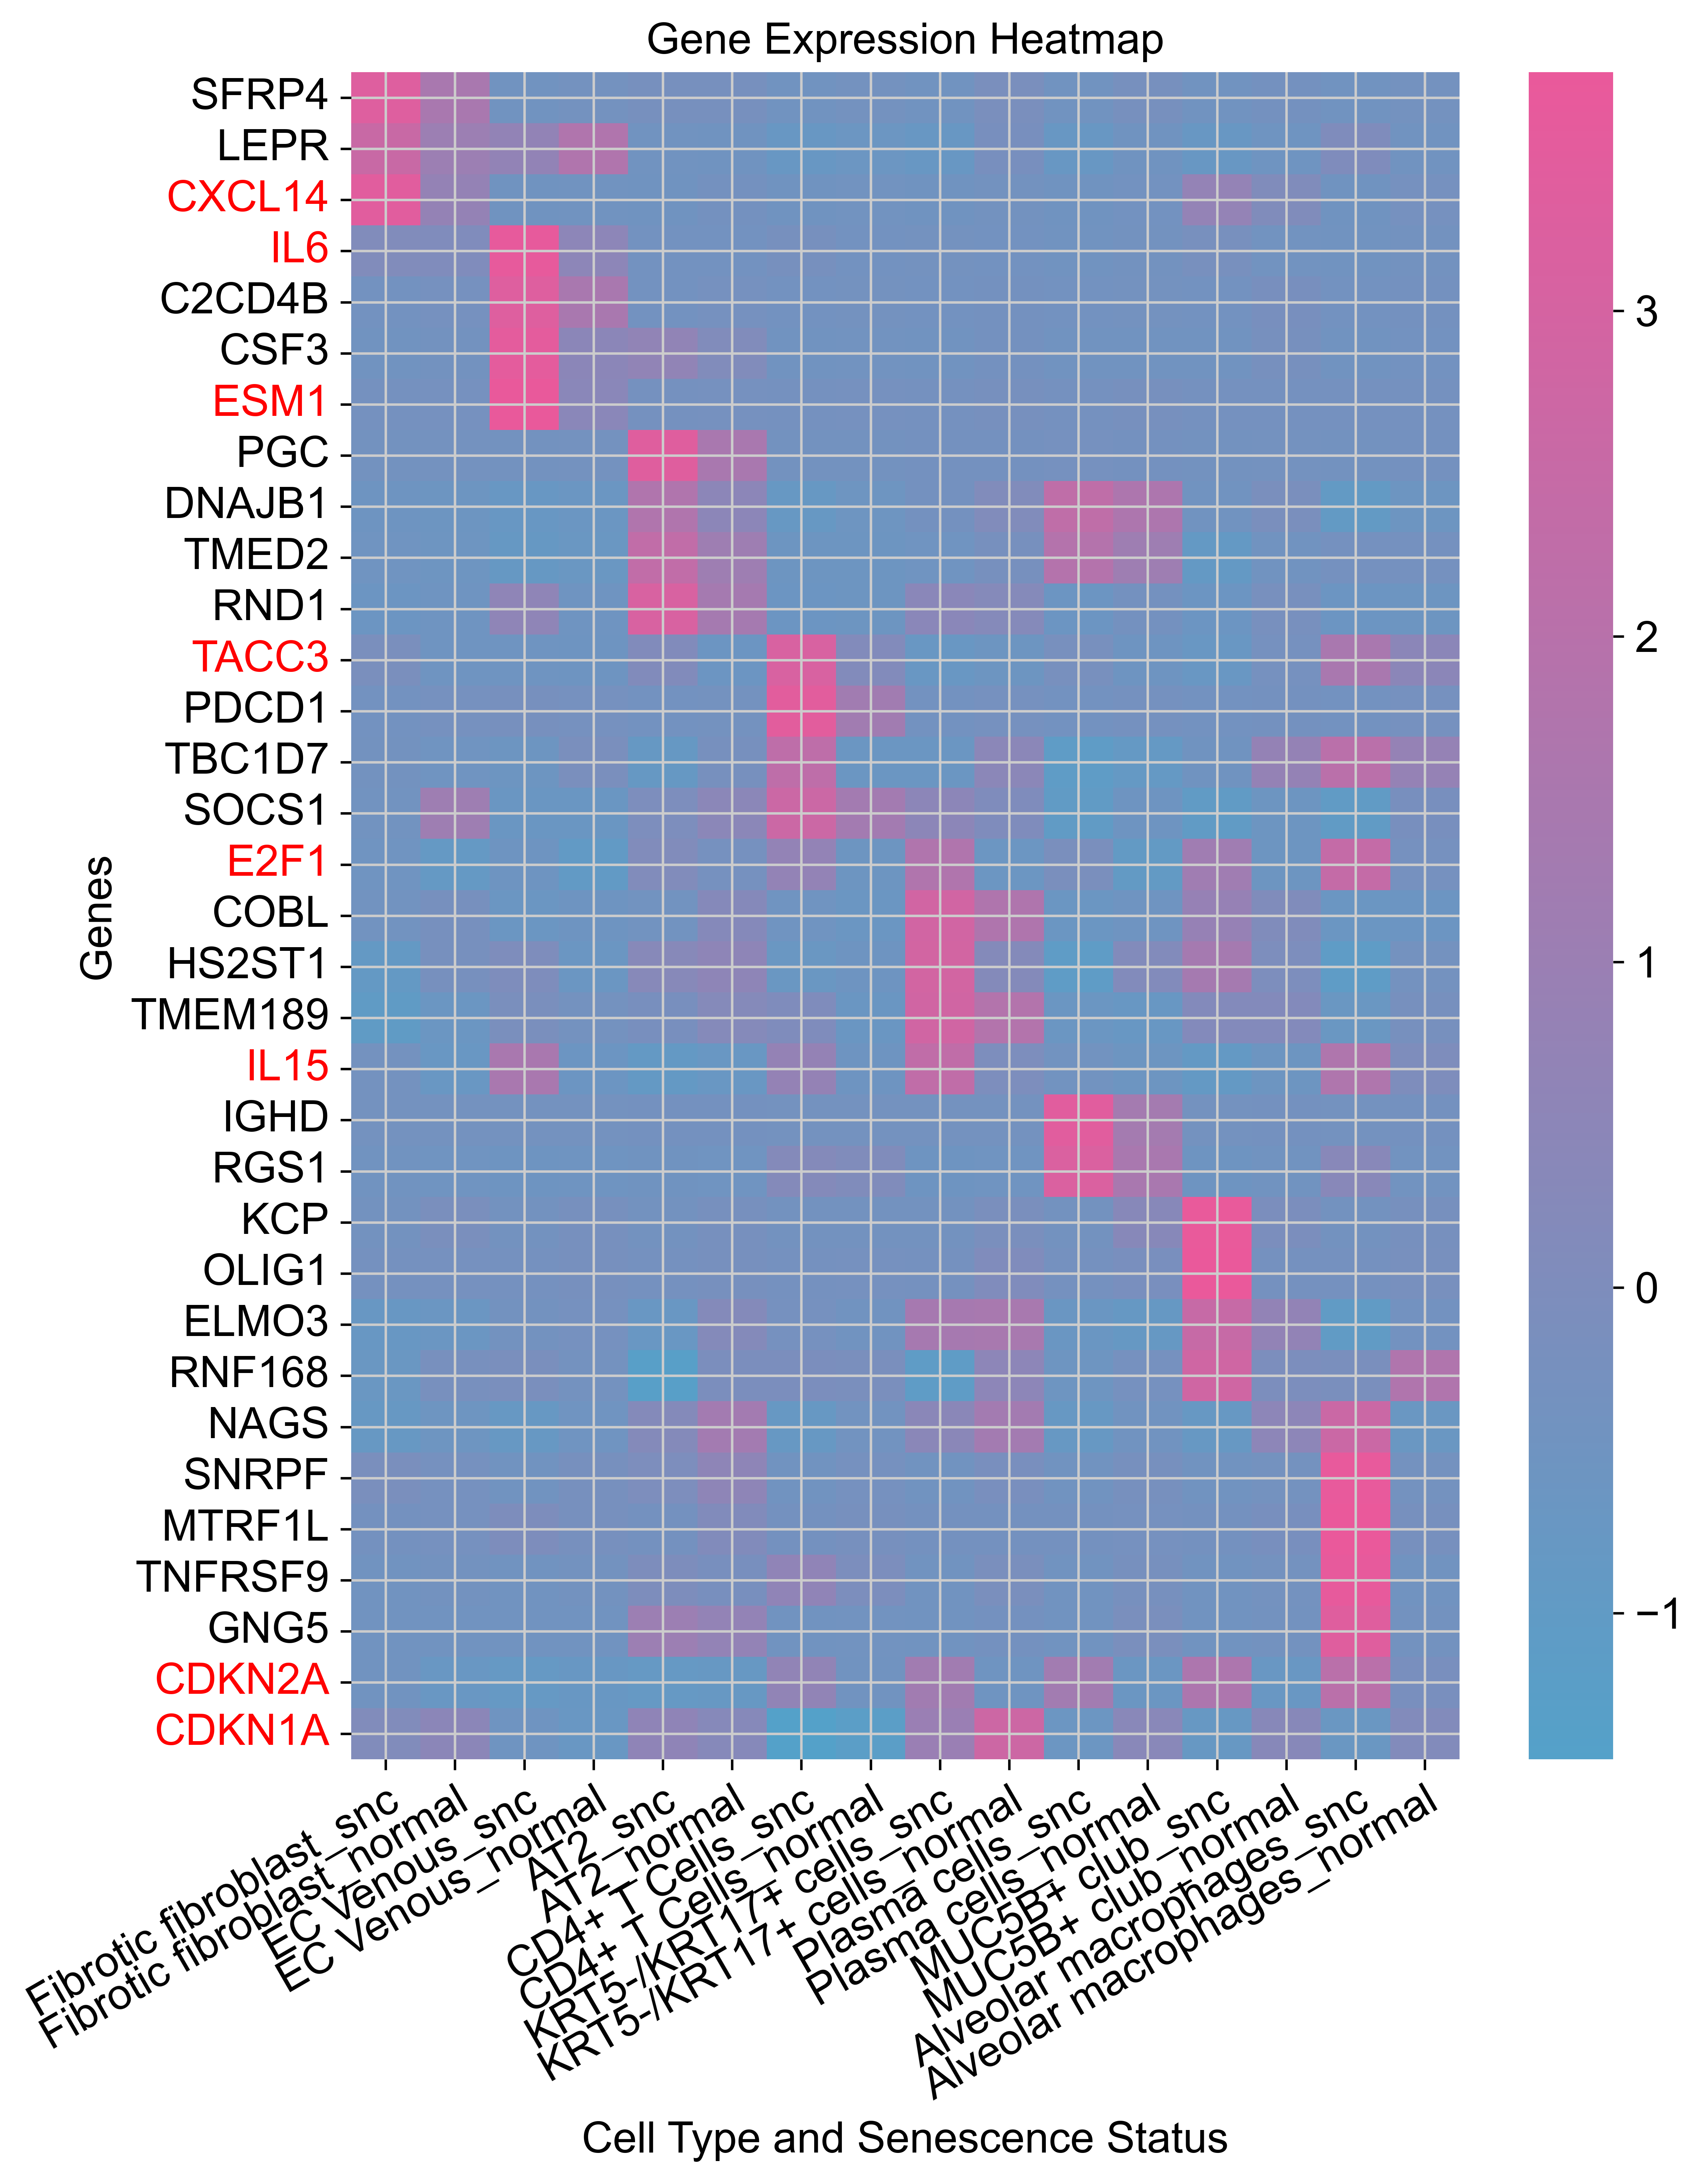

In [194]:
plt.figure(figsize=(8, 10))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')

ax = plt.gca()
ylabels = ax.get_yticklabels()
highlight_genes = ['CDKN2A', 'CDKN1A']  # Specify which genes to highlight

ls1=utils.load_markers(args)
ls1=set([j for i in ls1 for j in i])

for i in gene_list:
    if i in ls1:
        highlight_genes.append(i)

for label in ylabels:
    if label.get_text() in highlight_genes:
        label.set_color('red')

plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")  # Rotate x-axis labels by 45 degrees

plt.show()

In [195]:
selected_ct

['Fibrotic fibroblast',
 'EC Venous',
 'AT2',
 'CD4+ T Cells',
 'KRT5-/KRT17+ cells',
 'Plasma cells',
 'MUC5B+ club',
 'Alveolar macrophages']

In [196]:
gene_list = [['SFRP4','Fibrotic fibroblast'],
 ['LEPR','Fibrotic fibroblast'],
 ['CXCL14','Fibrotic fibroblast'],
 ['IL6','EC Venous'],
 ['C2CD4B','EC Venous'],
 ['CSF3','EC Venous'],
 ['ESM1','EC Venous'],
 ['PGC','AT2'],
 ['DNAJB1','AT2'],
 ['TMED2','AT2'],
 ['RND1','AT2'],
 ['TACC3','CD4+ T Cells'],
 ['PDCD1','CD4+ T Cells'],
 ['TBC1D7','CD4+ T Cells'],
 ['SOCS1','CD4+ T Cells'],
 ['E2F1','CD4+ T Cells'],
 ['COBL','KRT5-/KRT17+ cells'],
 ['HS2ST1','KRT5-/KRT17+ cells'],
 ['TMEM189','KRT5-/KRT17+ cells'],
 ['IL15','KRT5-/KRT17+ cells'],
 ['IGHD', 'Plasma cells'],
 ['RGS1', 'Plasma cells'],
 ['KCP','MUC5B+ club'],
 ['OLIG1','MUC5B+ club'],
 ['ELMO3','MUC5B+ club'],
 ['RNF168','MUC5B+ club'],
 ['NAGS','Alveolar macrophages'],
 ['SNRPF','Alveolar macrophages'],
 ['MTRF1L','Alveolar macrophages'],
 ['TNFRSF9','Alveolar macrophages'],
 ['GNG5','Alveolar macrophages']]


In [197]:
pd.DataFrame(gene_list,columns=['gene name','cell type']).to_csv("/bmbl_data/chenghao/sencell/SnGs/table3.csv",index=0)

In [198]:
table2

gene     p_val     logFC  p_val_adj             cell type
7058     P2RY8  0.953094  0.250875        1.0   Fibrotic fibroblast
5526   TM4SF19  0.984357  0.251836        1.0   Fibrotic fibroblast
4518     KLRC1  0.992178  0.258192        1.0   Fibrotic fibroblast
6752      MMP9  0.960904  0.273078        1.0   Fibrotic fibroblast
4507      ARG1  0.992178  0.275010        1.0   Fibrotic fibroblast
...        ...       ...       ...        ...                   ...
11380  GOLGA8A  0.798702  2.142264        1.0  Alveolar macrophages
6081     RBM20  0.987283  2.146937        1.0  Alveolar macrophages
7690     CXCL9  0.961862  2.244690        1.0  Alveolar macrophages
11043    ICAM3  0.823420  2.380874        1.0  Alveolar macrophages
745     PLA2G7  0.621225  5.230355        1.0  Alveolar macrophages

[752 rows x 5 columns]

In [199]:
ls1=utils.load_markers(args)
ls1=set([j for i in ls1 for j in i])

各marker list所包含的gene数：
  SenMayo    FRIDMAN    CellAge    Cell Cycle Markers
---------  ---------  ---------  --------------------
      125         77        144                    11


In [200]:
ls4=list(set(table2['gene'].tolist()))
table4=[]
for gene in ls4:
    count=0
    ct_ls=[]
    if gene in ls1:
        flag=True
    else:
        flag=False
    for key,value in overlap_genes.items():
        if gene in value:
            count+=1
            ct_ls.append(key)
    table4.append([gene,count,",".join(ct_ls),flag])

In [201]:
df4=pd.DataFrame(table4,columns=['gene name','counts','cell types','is in hallmarker'])
df4.to_csv("/bmbl_data/chenghao/sencell/SnGs/table4.csv",index=0)

In [212]:
def caculate_GSEA(adata,args,gene_list=None):
    import pandas as pd
    import gseapy as gp
    
    gene_expression_df = pd.DataFrame(adata.X.T, index=adata.var.index, columns=adata.obs.index)
    if gene_list is None:
        all_marker_genes=utils.load_markers(args)
        all_marker_genes=all_marker_genes[0]+all_marker_genes[-1]
        # all_marker_genes=list(set([j for i in all_marker_genes for j in i]))
    else:
        all_marker_genes=gene_list
    
    gene_sets = {'GeneSet1': all_marker_genes}

    # Run ssGSEA
    ssgsea_results = gp.ssgsea(data=gene_expression_df, gene_sets=gene_sets, 
                               min_size = 1,
                               sample_norm_method='rank', outdir=None)

    # Extract enrichment scores
    enrichment_scores = ssgsea_results.res2d

    return enrichment_scores


ls1=[
"DPY30","CBX8","DEK","TUBGCP2","WNT16","HPS5","TYK2","CXCL14","PLAU","CSF2","TNFRSF11B","GADD45A","C3","BEX3","RBL2","MAP2K1","NME2","BHLHE40","CLTB","CCL3","CXCL10","IFI16","ETS1","ITGA2","CDK6","ICAM1","GRK6","IL15","GMFG","MMP3","PTGER2","SIRT1","TERT","ERRFI1","MDM2","MVK","IGFBP1","MIF","CCL2","FAS","KCNJ12","ESM1","DLX2","KITLG","PRPF19","MAPK12","CDK4","IL2","RAC1","RHOB","MAP3K7","MAP2K3","MAP2K7","HK3","PROX1","HRAS","CD55","MMP9","SOD1","PMVK","MCRS1","IGFBP7","CSF2RB","TNFRSF10C","NRG1","TES","NANOG","LCP1","CREG1","EREG","WNT2","IL8","IL32","STAT1","SREBF1","CITED2","EIF2S2","MMP2","FBXO31","GSN","MOB3A","SPX","RRAS","CHEK1","THBS1","ING1","SRSF1","IL18","GEM","PIGF","AOPEP","PTBP1","SERPINB2","DDB2","MAP3K6","TP63","CXCL1","BCL6","MAGEA2","FOS","EWSR1","CDKN1A","IFNG","HTATIP2","CCL20","PDIK1L","PAK4","MAP2K6","GLB1","NINJ1","EHF","IGF1","PKM","HMGB1","ANGPT1","SPARC","ETS2","IL6ST","PLAT","IQGAP2","PAPPA","EGF","SCAMP4","JUN","IRF5","CDKN2B","SRC","PECAM1","ARPC1B","NEK6","RABGGTA","ID4","CCL1","CXCL8","NADK","PTGES","PLAUR","HGF","RUNX1","SFN","CTNNB1","MMP14","ADCK5","RPS6KA5","CDKN2A","FILIP1L","CKB","UBTD1","CD9","TOP1","ITPK1","ISG15","MXD4","EDN1","MAP1LC3B","BLK","CCND1","CXCL16","ANG","EGFR","IGFBP6","TNF","S100A11","CCL8","MAPKAPK5","TP53","CDK18","AKT1","TGFB1I1","FGF1","TFAP4","PEX19","TMSB4X","MAP2K2","BMP6","TNFAIP3","IGFBP2","HEPACAM","CCL5","BMP2","IL1B","CRYAB","PTTG1","ALOX15B","WT1","GUK1","AREG","PDCD10","CYP1B1","PIK3R5","CXCR2","SPIN1","TNFAIP2","MMP12","FGF2","IRF7","SORBS2","CDKN2D","DKK1","ZFP36","CCL26","STK40","HDAC1","CXCL2","SMURF2","VGF","MORC3","GDF15","IGSF3","ACLY","E2F1","GKN1","SERPINE2","LIMK1","IL6","TACC3","SOX2","SGK1","TNFRSF1B","RAB13","IRF3","NFE2L2","RAF1","TRIM28","ZNF148","CDKN2AIP","RAB31","AXL","PNPT1","SUPT5H","SEMA3F","CD44","ID1","ANGPTL4","MYC","STK32C","PGF","PIAS4","COL1A2","HBS1L","RGL2","AAK1","CCL24","TFAP2A","SLC13A3","SYK","MMP13","CST4","CDKN1C","ACVR1B","OTX2","VEGFC","IGFBP5","ICAM3","CCN2","STAT5B","CCL7","MORF4","ALDH1A3","MATK","PML","MMP10","IGFBP4","FGF7","IGFBP3","ITPKA","TSPYL5","ATM","IL1A","MAST1","MMP1","SMARCB1","NDN","PDZD2","TERF2","HSPA2","SERPINB4","TLR3","PDPK1","IL10","TIMP2","SOX5","POU5F1","CCL16","SPP1","IL13","IL7","CXCL3","NAP1L4","SP1","VIM","OPTN","CCL3L1","F3","ITPKB","RBP2","MAPK14","SELPLG","SMPD1","TNFRSF1A","CCL4","RAB5B","CSF1","CDKN1B","CCL13","ABI3","PPM1D","G6PD","FASTK","VEGFA","SIK1","BRAF","CYR61","CTSB","SERPINE1","INHA","PEA15","FN1","PSMB5","CXCL12"
        ]


results_df=caculate_GSEA(adata,args,gene_list=ls1)
results_df.index=results_df['Name']
results_df['is_sen']=adata.obs['is_sen']
results_df['clusters']=adata.obs['clusters']
results_df1=results_df[results_df["clusters"].isin(selected_ct)]

Text(0.5, 1.0, 'GSEA activity score by Cell Type')

<Figure size 3000x2400 with 0 Axes>

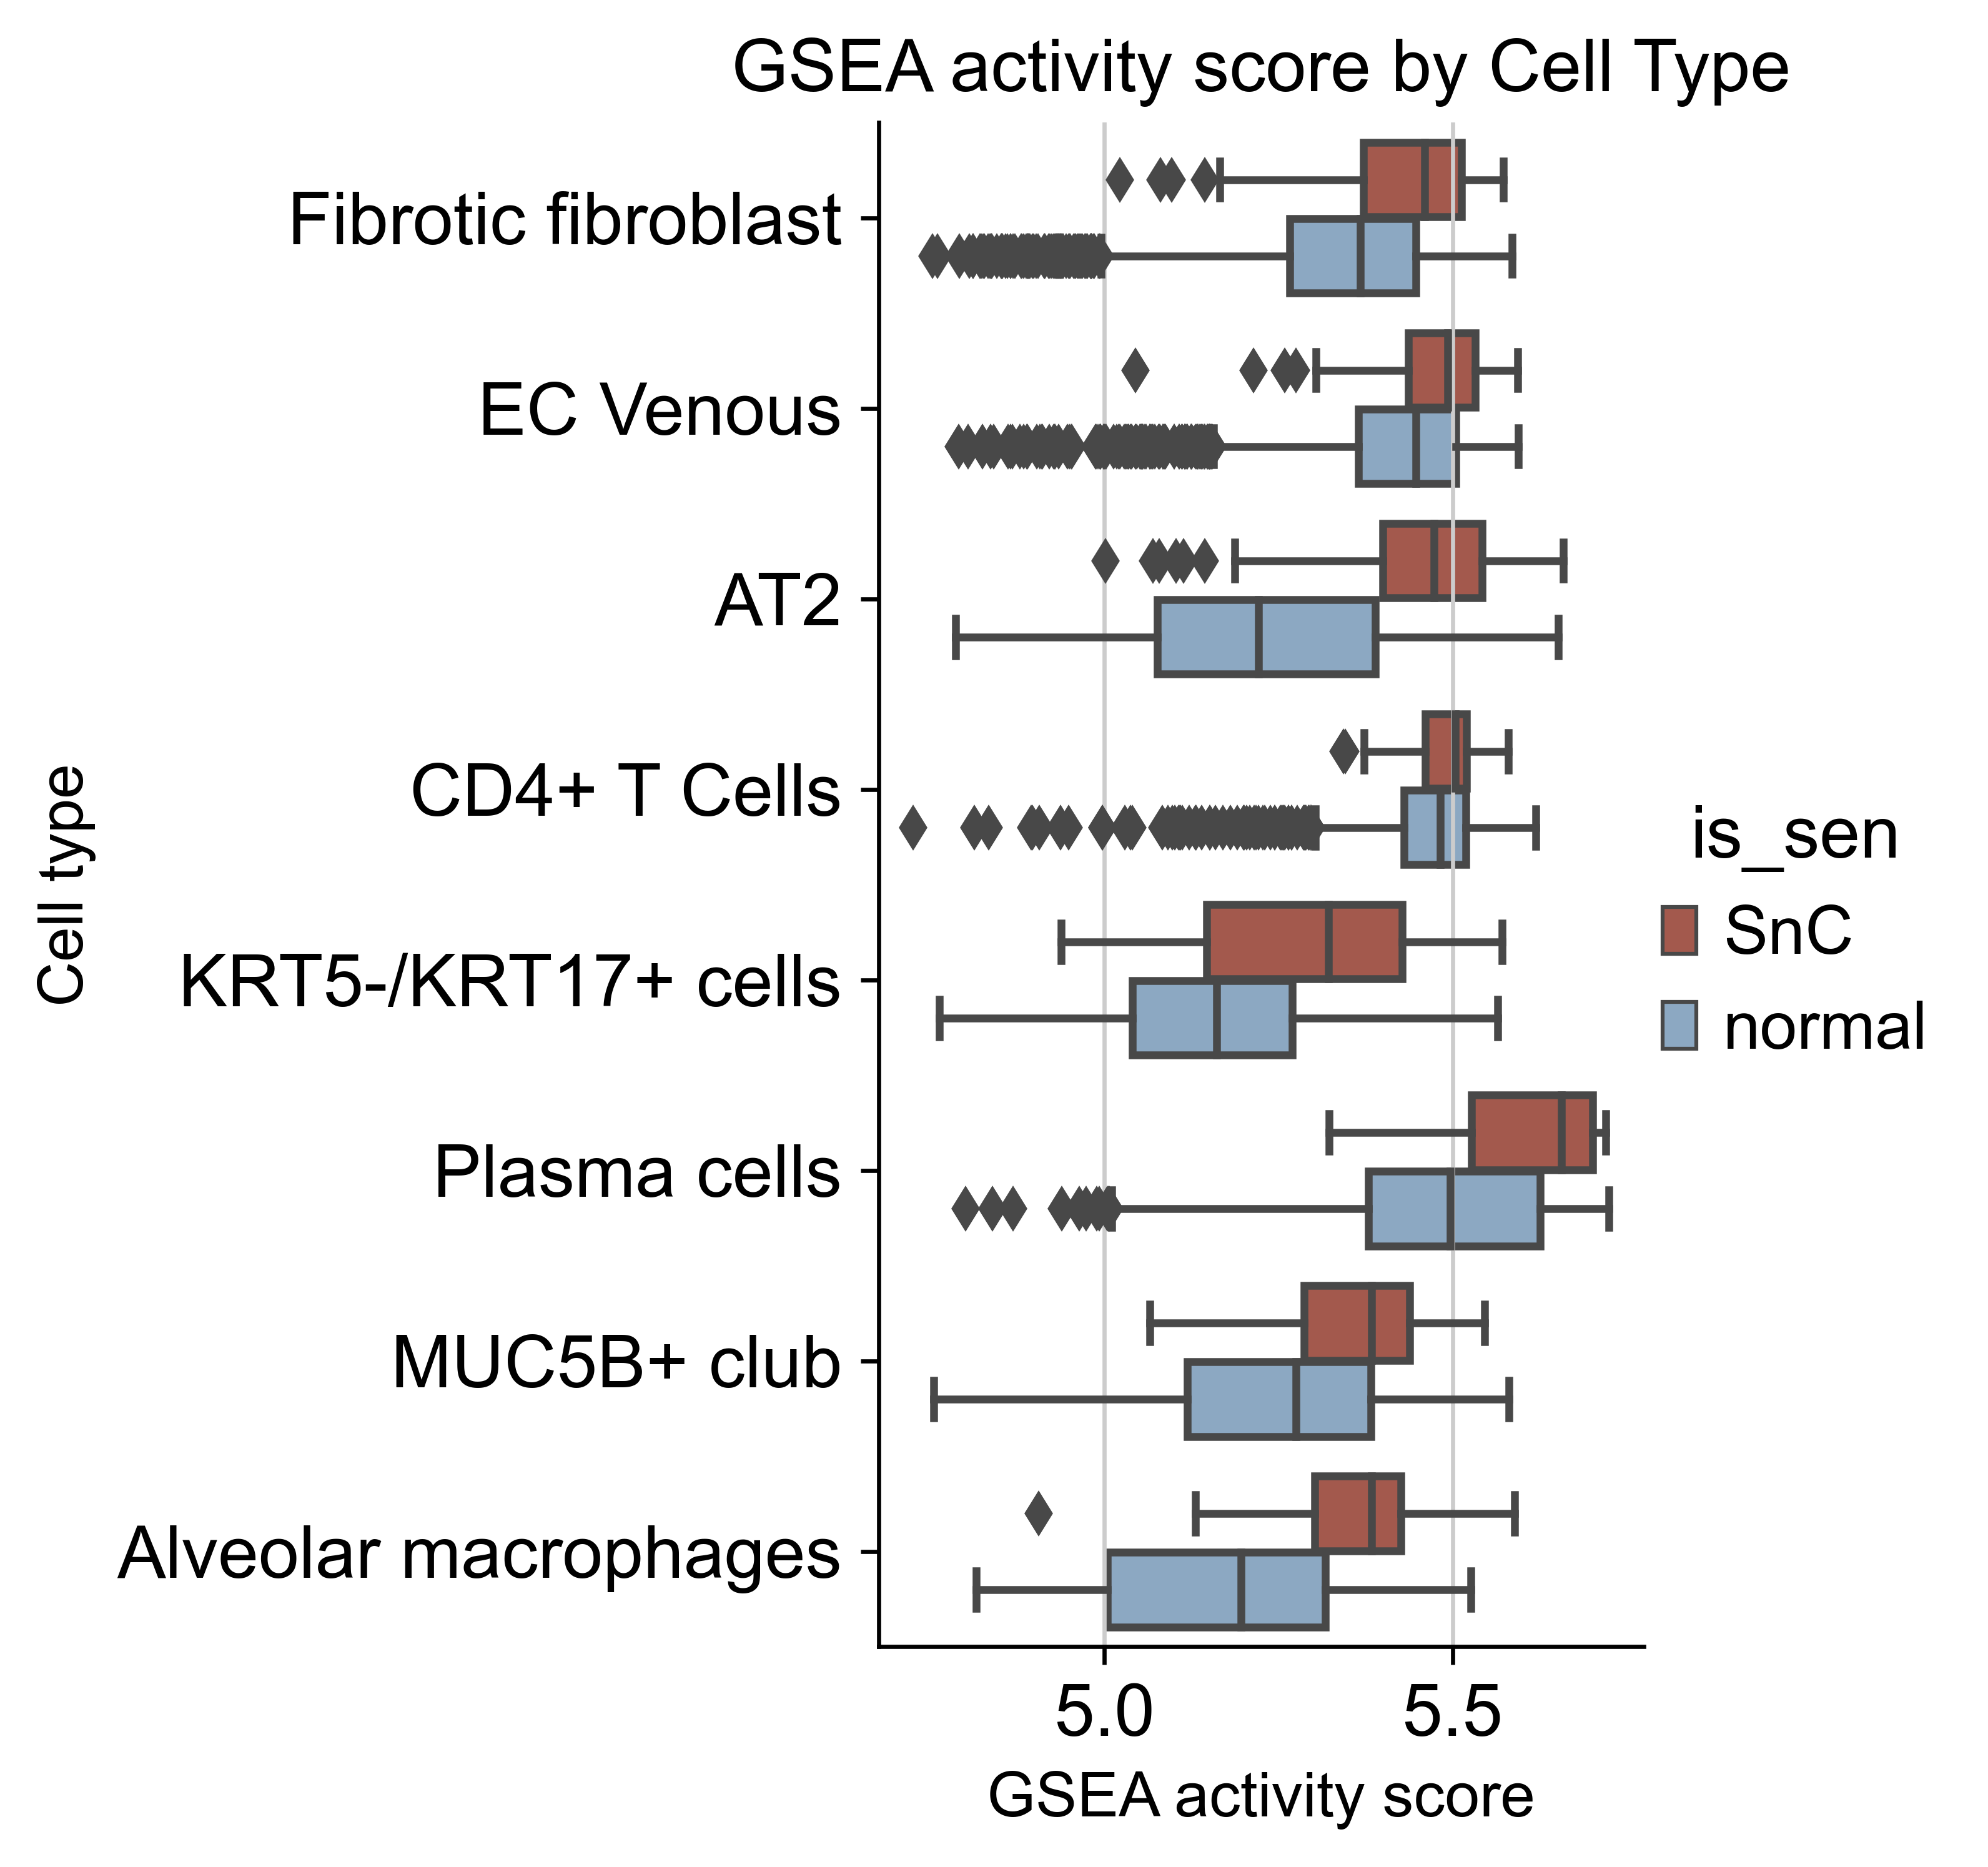

In [213]:
import seaborn as sns

plt.figure(figsize=(10, 8))
g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)

In [ ]:
ls1=utils.load_markers(args)

In [ ]:
ls2=list(set([j for i in ls1 for j in i]))

In [ ]:
results_df=caculate_GSEA(adata,args,gene_list=ls2)
results_df.index=results_df['Name']
results_df['is_sen']=adata.obs['is_sen']
results_df['clusters']=adata.obs['clusters']
results_df1=results_df[results_df["clusters"].isin(selected_ct)]

g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)

In [151]:
pd.DataFrame(adata.X, 
             index=adata.obs_names, columns=adata.var_names).to_csv("./fixdata_0709.csv"),

(None,)

In [150]:
def create_new(row):
    if row['is_sen'] =='SnC' and row['clusters'] in selected_ct:
        return f'SnC_{row["clusters"]}'
    if row['is_sen'] =='normal':
        return row['clusters']
    return 'error'

# Apply the function to the 'age_range' column to create a new 'age' column
adata.obs['new_ct']=adata.obs.apply(create_new,axis=1)

In [152]:
adata.obs['new_ct'].value_counts()

Fibrotic fibroblast            2257
AT2                            2071
EC Venous                      2017
EC Arterial                    1847
Dendritic cells                1425
CD4+ T Cells                   1118
KRT5-/KRT17+ cells             1077
EC General capillary            950
Monocyte-derived macrophage     926
CD8+ T Cells                    892
Smooth muscle cells             863
Ciliated                        761
Plasma cells                    759
SPP1+ macrophages               679
Alveolar fibroblasts            652
MUC5B+ club                     632
Alveolar macrophages            520
SCGB3A2+/SCGB1A1+ club          512
Monocyte                        507
Mast cells                      399
NK cells                        392
Pericyte                        362
Goblet                          330
AT1                             292
EC Lymphatic                    248
B cells                         206
SnC_Fibrotic fibroblast         176
Inflammatory fibroblasts    

In [153]:
adata.obs.to_csv('./fixdata_0627_obs.csv')

In [ ]:
adata.obs['new_ct']

In [154]:
t=[]
for i in selected_ct:
    t.append(i)
    t.append(f'SnC_{i}')
t

['Fibrotic fibroblast',
 'SnC_Fibrotic fibroblast',
 'EC Venous',
 'SnC_EC Venous',
 'AT2',
 'SnC_AT2',
 'CD4+ T Cells',
 'SnC_CD4+ T Cells',
 'KRT5-/KRT17+ cells',
 'SnC_KRT5-/KRT17+ cells',
 'Plasma cells',
 'SnC_Plasma cells',
 'MUC5B+ club',
 'SnC_MUC5B+ club',
 'Alveolar macrophages',
 'SnC_Alveolar macrophages']

In [155]:
for i in gene_list:
    print(i)

SFRP4
LEPR
CXCL14
IL6
C2CD4B
CSF3
ESM1
PGC
DNAJB1
TMED2
RND1
TACC3
PDCD1
TBC1D7
SOCS1
E2F1
COBL
HS2ST1
TMEM189
IL15
IGHD
RGS1
KCP
OLIG1
ELMO3
RNF168
NAGS
SNRPF
MTRF1L
TNFRSF9
GNG5
CDKN2A
CDKN1A


In [95]:
import gc

# Trigger garbage collection
gc.collect()

6229

In [ ]:
# Step 1: Extract the data
gene_list = new_list

cell_types=selected_ct
adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

In [226]:
value[(value['logFC']>=0.25)]['gene'].values

array(['MGAM2', 'HSPBAP1', 'SGIP1', ..., 'STARD13', 'NFKB1', 'PAFAH1B2'],
      dtype=object)

['MGAM2',
 'HSPBAP1',
 'SGIP1',
 'SYN2',
 'FAM83F',
 'LOXL4',
 'PCDHGA2',
 'WWC3',
 'FGFBP2',
 'IGSF3',
 'SH3BP5',
 'CD69',
 'RHOG',
 'LUM',
 'HDAC9',
 'PRDM8',
 'CLEC4D',
 'ACP2',
 'CLDN5',
 'ADORA3',
 'CCDC89',
 'ADRA1A',
 'ECSCR',
 'HHIPL1',
 'APOBR',
 'IGFBP5',
 'CXCR1',
 'DPEP1',
 'FER1L5',
 'RFX8',
 'TSKU',
 'DZIP1L',
 'NPR3',
 'RCN1',
 'FGD5',
 'SFMBT2',
 'FABP6',
 'ENTPD1',
 'STEAP1',
 'IL4I1',
 'SLC11A1',
 'PLXNC1',
 'SMCHD1',
 'LY96',
 'PABPN1L',
 'CD109',
 'ITK',
 'LIPN',
 'PLCXD3',
 'FLII',
 'MOXD1',
 'IGFBP2',
 'C2orf81',
 'GRAP2',
 'SLC2A1',
 'GIT1',
 'GAS2L1',
 'BOC',
 'CD200R1',
 'DOK6',
 'CORO6',
 'RSPH4A',
 'ABCB1',
 'FGFR4',
 'SIGLEC7',
 'OLFM2',
 'TNFAIP2',
 'HOXC4',
 'PDLIM5',
 'CCNF',
 'VASH2',
 'COL19A1',
 'MMD',
 'TLR10',
 'SEMA6B',
 'TNFSF4',
 'FGR',
 'MGAT3',
 'RASIP1',
 'TMCC3',
 'CD6',
 'EPB41L2',
 'FYB2',
 'CPA3',
 'EHD1',
 'STARD3',
 'FIBCD1',
 'SRPX',
 'CPNE7',
 'NT5DC1',
 'CCBE1',
 'OAS1',
 'GLT8D2',
 'PLVAP',
 'BST2',
 'GBP4',
 'ARL11',
 'LGALS3BP',
 'K

In [150]:
select_genes=[]
for key,value in deg_results_full.items():
    ls=value['gene'].values.tolist()[:20]
    for i in ls:
        if i not in select_genes:
            select_genes.append(i)
            
overlap_genes=list(set(sen_gene_names).union(set(select_genes)))

In [117]:
def caculate_GSEA(adata,args,gene_list=None):
    import pandas as pd
    import gseapy as gp
    
    gene_expression_df = pd.DataFrame(adata.X.T, index=adata.var.index, columns=adata.obs.index)
    if gene_list is None:
        all_marker_genes=utils.load_markers(args)
        all_marker_genes=all_marker_genes[0]+all_marker_genes[-1]
        # all_marker_genes=list(set([j for i in all_marker_genes for j in i]))
    else:
        all_marker_genes=gene_list
    
    gene_sets = {'GeneSet1': all_marker_genes}

    # Run ssGSEA
    ssgsea_results = gp.ssgsea(data=gene_expression_df, gene_sets=gene_sets, 
                               min_size = 1,
                               sample_norm_method='rank', outdir=None)

    # Extract enrichment scores
    enrichment_scores = ssgsea_results.res2d

    return enrichment_scores

results_df=caculate_GSEA(adata,args,gene_list=ls2)
results_df.index=results_df['Name']
results_df['is_sen']=adata.obs['is_sen']
results_df['clusters']=adata.obs['clusters']
results_df1=results_df[results_df["clusters"].isin(selected_ct)]

Text(0.5, 1.0, 'GSEA activity score by Cell Type')

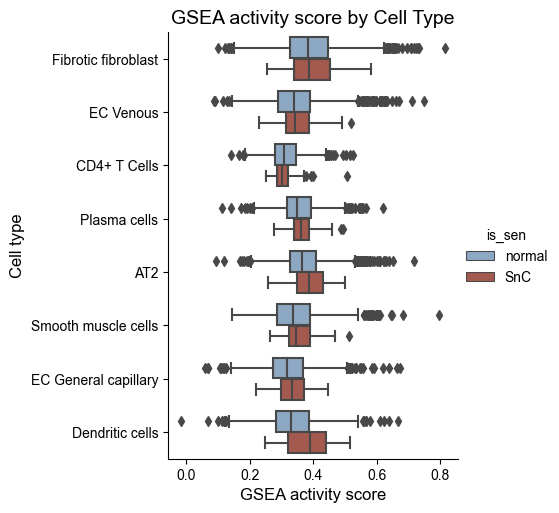

In [110]:
# senmayo+cell cycle
import seaborn as sns
g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)

Text(0.5, 1.0, 'GSEA activity score by Cell Type')

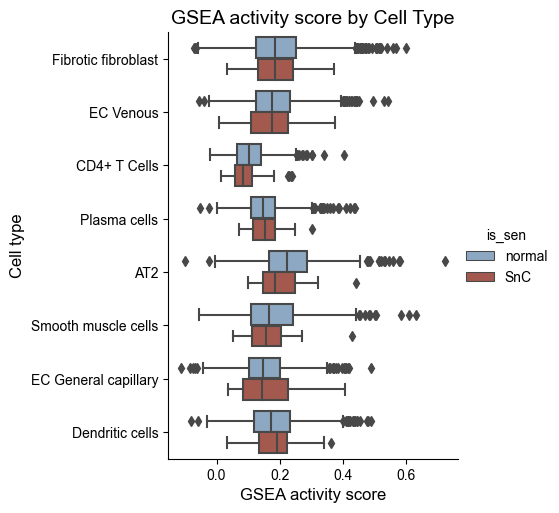

In [112]:
# gene_list=sen_gene_names
import seaborn as sns
g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)

Text(0.5, 1.0, 'GSEA activity score by Cell Type')

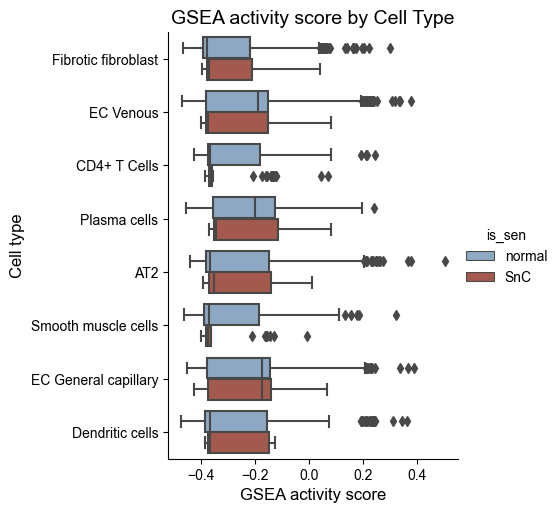

In [115]:
# gene_list=select_genes
import seaborn as sns
g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)

Text(0.5, 1.0, 'GSEA activity score by Cell Type')

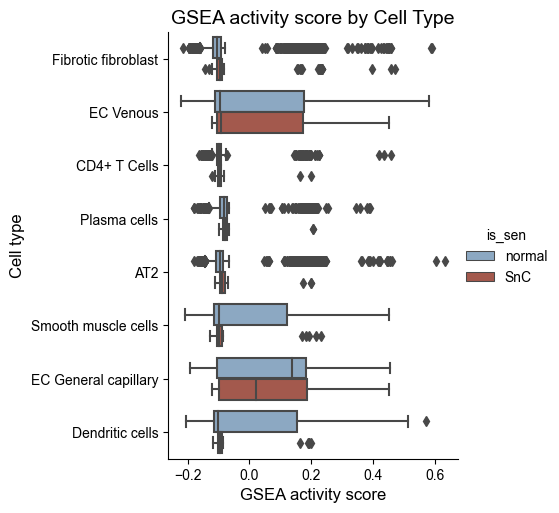

In [118]:
# gene_list=intersection genes
import seaborn as sns
g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)

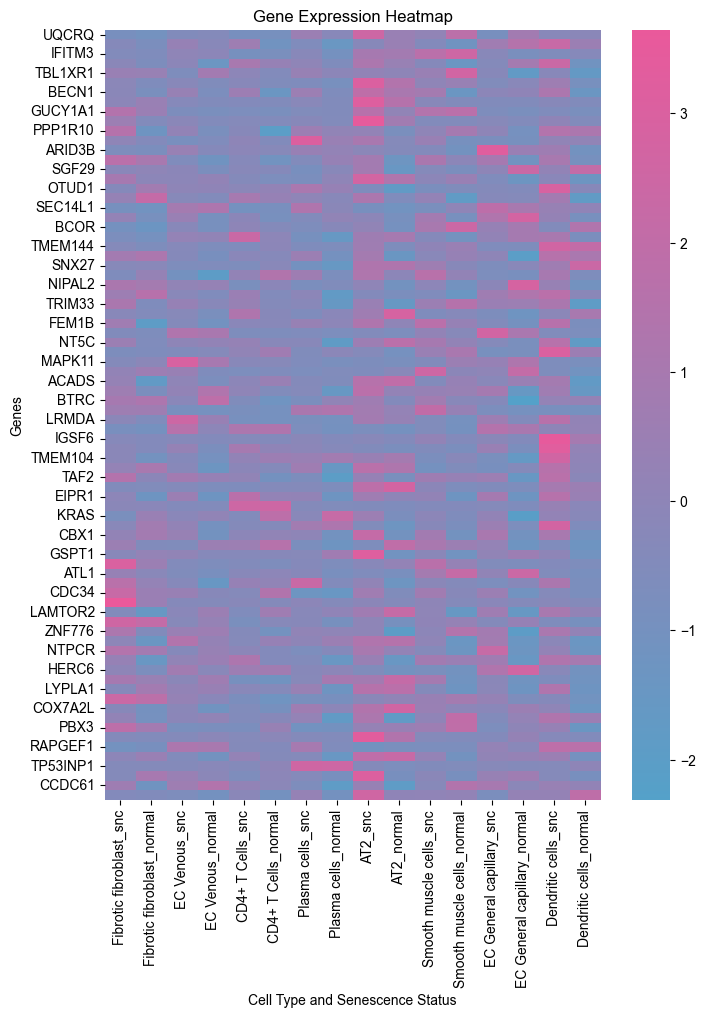

In [123]:


adata1=new_data.copy()
adata1.obs['is_sen']=adata.obs['is_sen']
adata1.X=adata1.X.todense()

# Assuming `adata` is your AnnData object and `gene_list` is your list of genes of interest

# Step 1: Extract the data
gene_list = select_genes

cell_types=selected_ct

adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(normal_expr)
        gene_expression.append(snc_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

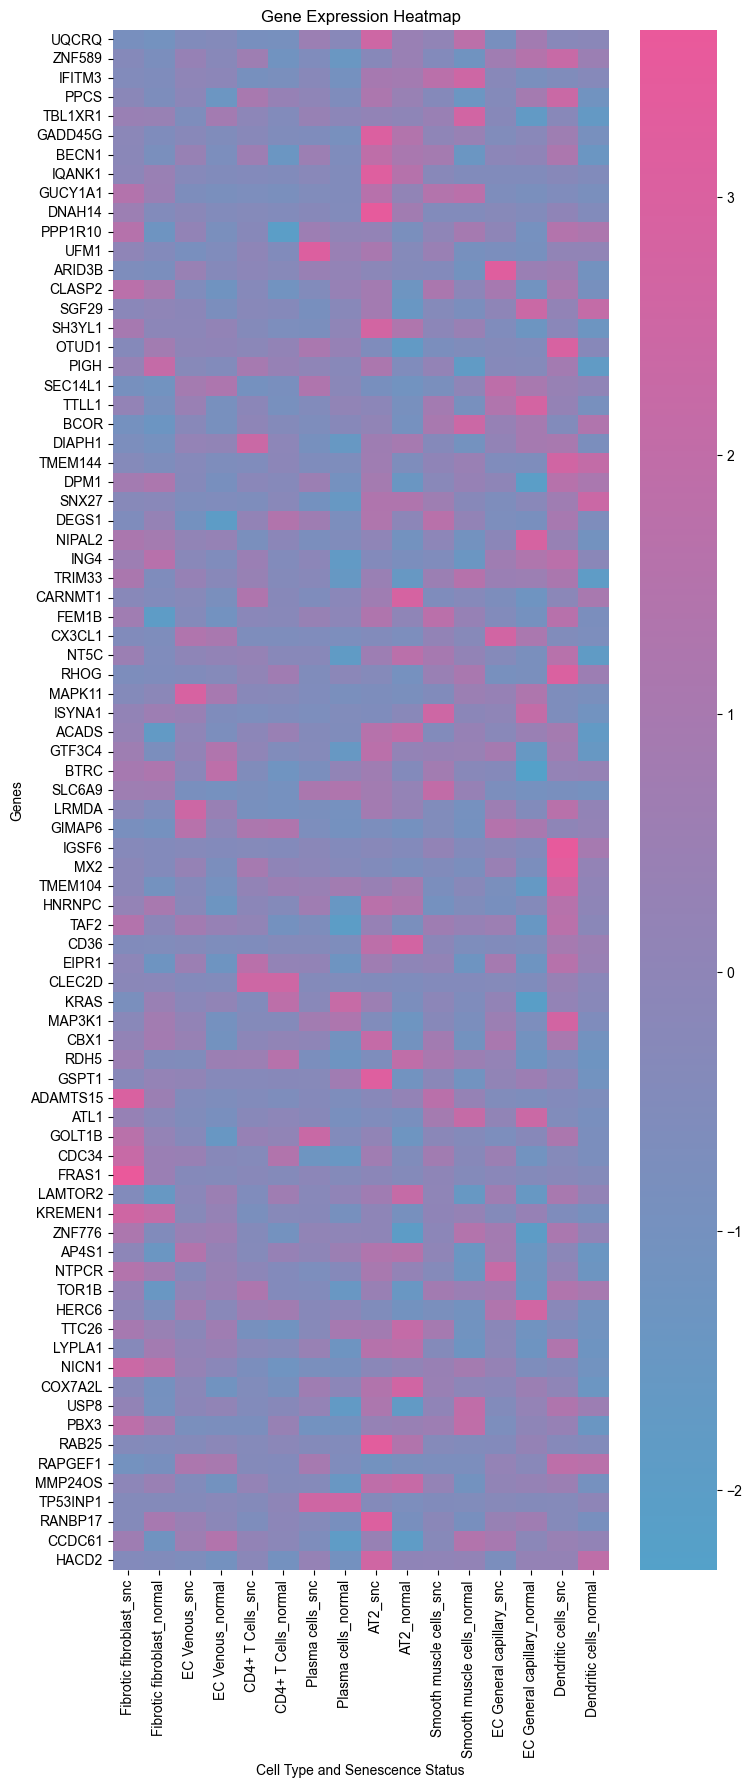

In [124]:
plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

In [126]:
# Initialize an empty list to hold the results
cell_type_specific_snc_genes = []
gene_list = select_genes

# Loop over each cell type
for cell_type in selected_ct:
    # Calculate the mean expression for normal and snc cells for each gene in the list
    normal_expr = adata[ (adata.obs['is_sen'] == 'normal')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
    snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
    # Calculate the differential expression (snc - normal)
    diff_expr = snc_expr - normal_expr
    # Select genes with high expression in snc and low expression in normal
    threshold_high = np.percentile(diff_expr, 75)  # Define your threshold for high expression in snc
    threshold_low = np.percentile(normal_expr, 25)  # Define your threshold for low expression in normal
    print(threshold_high,threshold_low)
    specific_snc_genes = [gene_list[i] for i in range(len(gene_list)) if diff_expr[i] > threshold_high and normal_expr[i] < threshold_low]
    
    # Store the result
    cell_type_specific_snc_genes.append({
        'clusters': cell_type,
        'specific_snc_genes': specific_snc_genes
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(cell_type_specific_snc_genes)
results_df

0.0005774629358895767 0.03596143297185535
-0.007772245429952508 0.03596143297185535
-0.008495487523673123 0.03596143297185535
-0.010985389338600108 0.03596143297185535
0.0040842968057724005 0.03596143297185535
-0.0020239367812050213 0.03596143297185535
-0.004669159532668294 0.03596143297185535
-0.0071012744608749696 0.03596143297185535


clusters                                 specific_snc_genes
0   Fibrotic fibroblast                   [ISYNA1, BTRC, SLC6A9, ADAMTS15]
1             EC Venous   [GTF3C4, BTRC, RDH5, AP4S1, NTPCR, HERC6, TTC26]
2          CD4+ T Cells         [TMEM144, ACADS, RDH5, ATL1, AP4S1, HERC6]
3          Plasma cells  [TTLL1, BTRC, SLC6A9, GSPT1, AP4S1, HERC6, TTC26]
4                   AT2                [ACADS, RDH5, AP4S1, TTC26, LYPLA1]
5   Smooth muscle cells                              [TMEM144, RDH5, ATL1]
6  EC General capillary         [TTLL1, ISYNA1, ACADS, GSPT1, ATL1, HERC6]
7       Dendritic cells                             [TMEM144, BTRC, TOR1B]

In [127]:
ls=results_df['specific_snc_genes'].values.tolist()
updated_ls=[]
for i in ls:
    for j in i:
        if j not in updated_ls:
            updated_ls.append(j)
updated_ls

['ISYNA1',
 'BTRC',
 'SLC6A9',
 'ADAMTS15',
 'GTF3C4',
 'RDH5',
 'AP4S1',
 'NTPCR',
 'HERC6',
 'TTC26',
 'TMEM144',
 'ACADS',
 'ATL1',
 'TTLL1',
 'GSPT1',
 'LYPLA1',
 'TOR1B']

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

adata1=new_data.copy()
adata1.obs['is_sen']=adata.obs['is_sen']
adata1.X=adata1.X.todense()

# Assuming `adata` is your AnnData object and `gene_list` is your list of genes of interest

# Step 1: Extract the data
gene_list = sen_gene_names

cell_types=selected_ct

adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(normal_expr)
        gene_expression.append(snc_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

KeyboardInterrupt: 

0.002438052734913113 0.031583611122832186
-0.004315407119850345 0.031583611122832186
-0.0030326732574965935 0.031583611122832186
-0.00771129583526731 0.031583611122832186
-0.0010865437360226171 0.031583611122832186
-0.00030592008101607666 0.031583611122832186
-0.0009810540529136252 0.031583611122832186
-0.0010396190149155092 0.031583611122832186


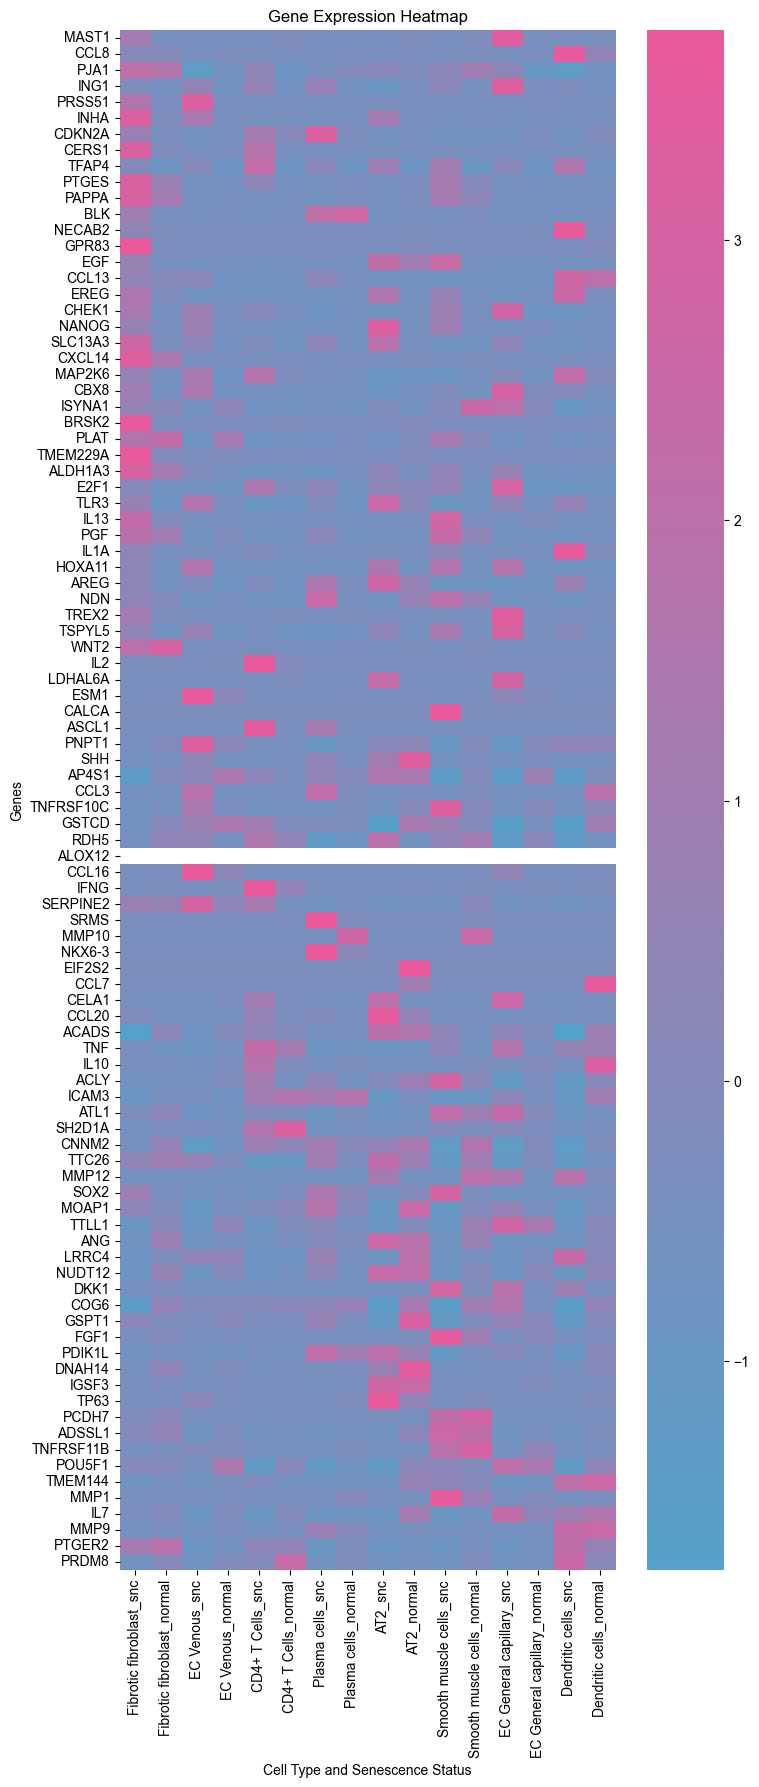

In [152]:
# Initialize an empty list to hold the results
cell_type_specific_snc_genes = []
gene_list = overlap_genes

# Loop over each cell type
for cell_type in selected_ct:
    # Calculate the mean expression for normal and snc cells for each gene in the list
    normal_expr = adata[ (adata.obs['is_sen'] == 'normal')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
    snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, [adata.var.index.get_loc(gene) for gene in gene_list]].mean(axis=0)
    # Calculate the differential expression (snc - normal)
    diff_expr = snc_expr - normal_expr
    # Select genes with high expression in snc and low expression in normal
    threshold_high = np.percentile(diff_expr, 75)  # Define your threshold for high expression in snc
    threshold_low = np.percentile(normal_expr, 25)  # Define your threshold for low expression in normal
    # print(threshold_high,threshold_low)
    specific_snc_genes = [gene_list[i] for i in range(len(gene_list)) if diff_expr[i] > threshold_high and normal_expr[i] < threshold_low]
    
    # Store the result
    cell_type_specific_snc_genes.append({
        'clusters': cell_type,
        'specific_snc_genes': specific_snc_genes
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(cell_type_specific_snc_genes)

ls=results_df['specific_snc_genes'].values.tolist()
updated_ls=[]
for i in ls:
    for j in i:
        if j not in updated_ls:
            updated_ls.append(j)
            

adata1=new_data.copy()
adata1.obs['is_sen']=adata.obs['is_sen']
adata1.X=adata1.X.todense()

# Assuming `adata` is your AnnData object and `gene_list` is your list of genes of interest

# Step 1: Extract the data
gene_list = updated_ls

cell_types=selected_ct
adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

In [154]:
len(updated_ls)

96

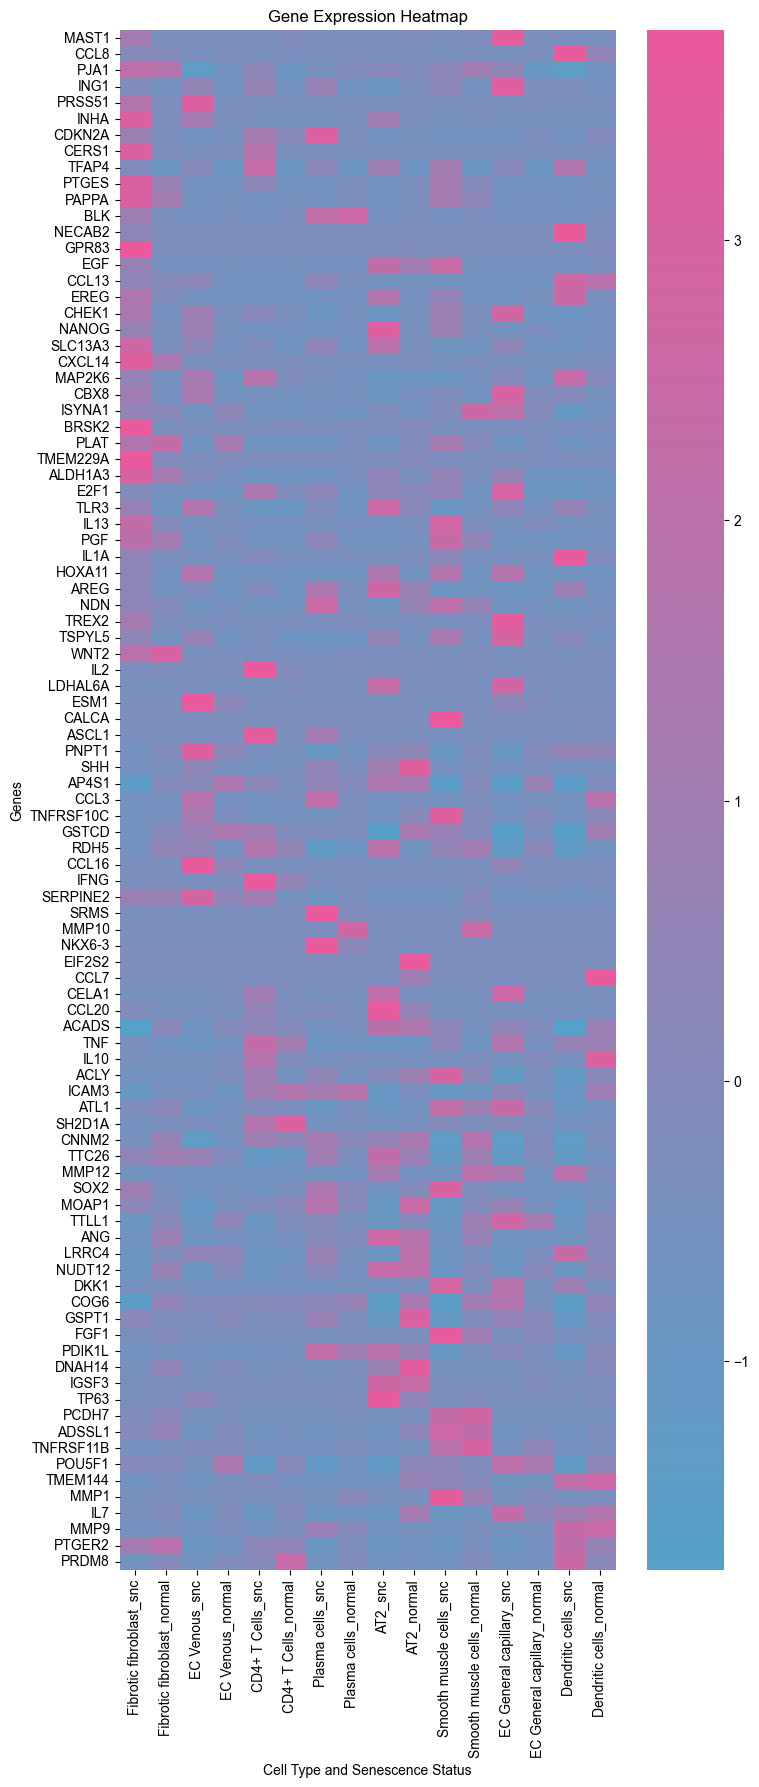

In [156]:
# Step 1: Extract the data
gene_list = ['MAST1',
 'CCL8',
 'PJA1',
 'ING1',
 'PRSS51',
 'INHA',
 'CDKN2A',
 'CERS1',
 'TFAP4',
 'PTGES',
 'PAPPA',
 'BLK',
 'NECAB2',
 'GPR83',
 'EGF',
 'CCL13',
 'EREG',
 'CHEK1',
 'NANOG',
 'SLC13A3',
 'CXCL14',
 'MAP2K6',
 'CBX8',
 'ISYNA1',
 'BRSK2',
 'PLAT',
 'TMEM229A',
 'ALDH1A3',
 'E2F1',
 'TLR3',
 'IL13',
 'PGF',
 'IL1A',
 'HOXA11',
 'AREG',
 'NDN',
 'TREX2',
 'TSPYL5',
 'WNT2',
 'IL2',
 'LDHAL6A',
 'ESM1',
 'CALCA',
 'ASCL1',
 'PNPT1',
 'SHH',
 'AP4S1',
 'CCL3',
 'TNFRSF10C',
 'GSTCD',
 'RDH5',
 'CCL16',
 'IFNG',
 'SERPINE2',
 'SRMS',
 'MMP10',
 'NKX6-3',
 'EIF2S2',
 'CCL7',
 'CELA1',
 'CCL20',
 'ACADS',
 'TNF',
 'IL10',
 'ACLY',
 'ICAM3',
 'ATL1',
 'SH2D1A',
 'CNNM2',
 'TTC26',
 'MMP12',
 'SOX2',
 'MOAP1',
 'TTLL1',
 'ANG',
 'LRRC4',
 'NUDT12',
 'DKK1',
 'COG6',
 'GSPT1',
 'FGF1',
 'PDIK1L',
 'DNAH14',
 'IGSF3',
 'TP63',
 'PCDH7',
 'ADSSL1',
 'TNFRSF11B',
 'POU5F1',
 'TMEM144',
 'MMP1',
 'IL7',
 'MMP9',
 'PTGER2',
 'PRDM8']

cell_types=selected_ct
adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

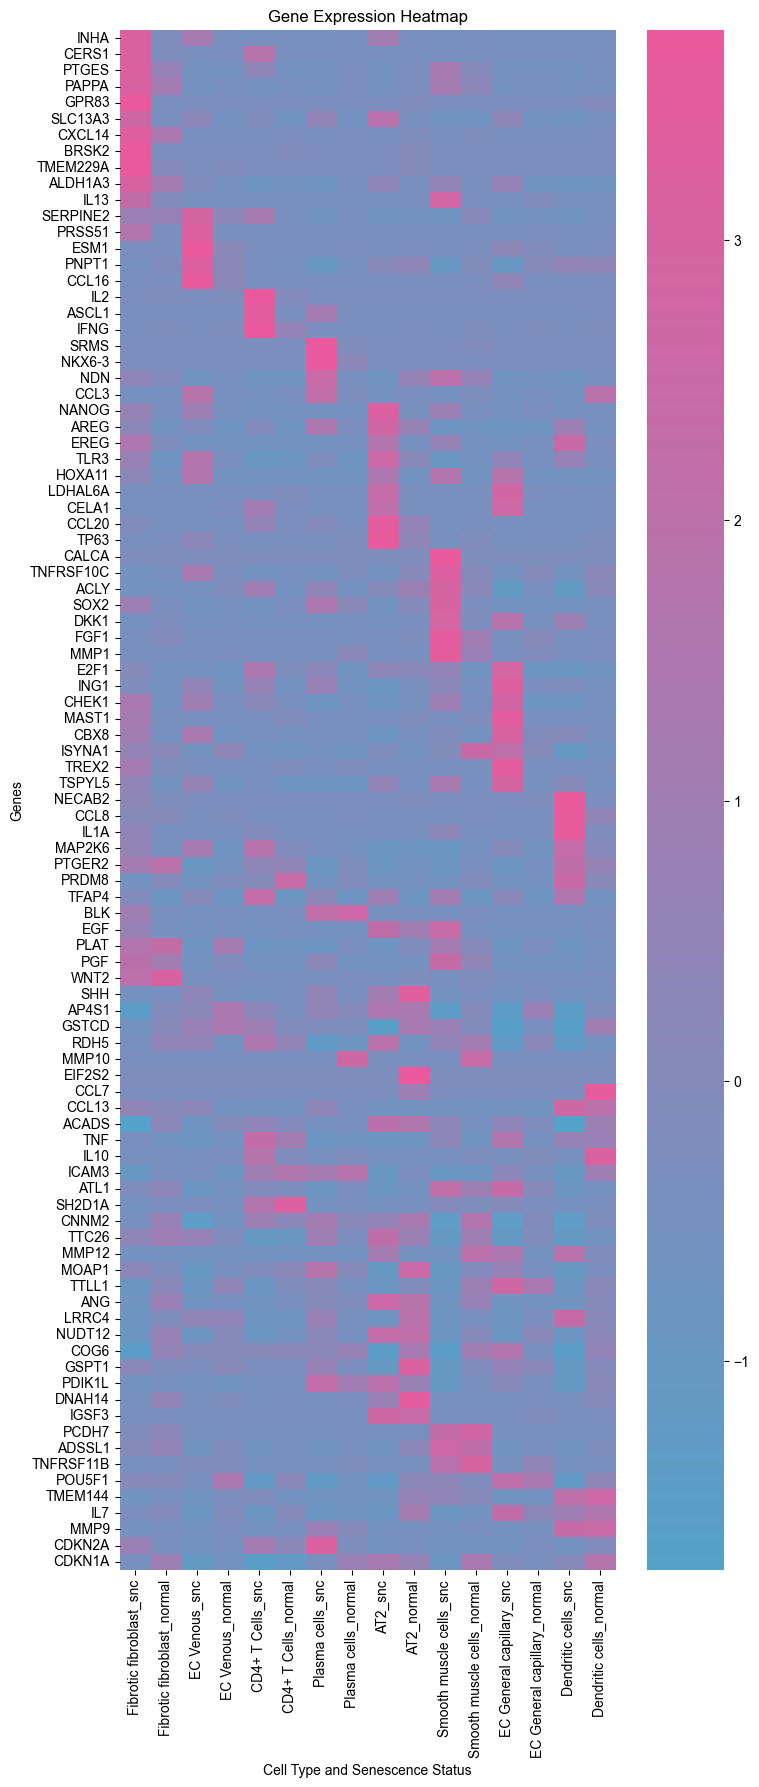

In [162]:
# Step 1: Extract the data
gene_list = [
 'INHA',
  'CERS1',
    'PTGES',
 'PAPPA',
'GPR83',
     'SLC13A3',
 'CXCL14',
'BRSK2',
    'TMEM229A',
 'ALDH1A3',
     'IL13',
 'SERPINE2',

 'PRSS51', 
  'ESM1',
 'PNPT1',
 'CCL16',

 'IL2',
     'ASCL1',
     'IFNG',

 'SRMS',
'NKX6-3',
     'NDN',
 'CCL3',

    
     'NANOG',
     'AREG',
     'EREG',
     'TLR3',
 'HOXA11',
     'LDHAL6A',
     'CELA1',
 'CCL20',
     'TP63',
    
    'CALCA',
     'TNFRSF10C',
 'ACLY',
 'SOX2',
     'DKK1',
 'FGF1',
 'MMP1',

    
    'E2F1',
    'ING1',
     'CHEK1',
    'MAST1',
 'CBX8',
 'ISYNA1',
     'TREX2',
 'TSPYL5',
    
    
    'NECAB2',
 'CCL8',
     'IL1A',
 'MAP2K6',

     'PTGER2',
 'PRDM8',
    
 'TFAP4',
 'BLK',
 'EGF',
 'PLAT',
 'PGF',

 'WNT2',
 'SHH',
 'AP4S1',
 'GSTCD',
 'RDH5',
 'MMP10',
 'EIF2S2',
 'CCL7',
'CCL13',
 'ACADS',
 'TNF',
 'IL10',
 'ICAM3',
 'ATL1',
 'SH2D1A',
 'CNNM2',
 'TTC26',
 'MMP12',
 'MOAP1',
 'TTLL1',
 'ANG',
 'LRRC4',
 'NUDT12',
 'COG6',
 'GSPT1',
 'PDIK1L',
 'DNAH14',
 'IGSF3',
 'PCDH7',
 'ADSSL1',
 'TNFRSF11B',
 'POU5F1',
 'TMEM144',
 'IL7',
 'MMP9',


 'CDKN2A',
    'CDKN1A',
]

cell_types=selected_ct
adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

各marker list所包含的gene数：
  SenMayo    FRIDMAN    CellAge    Cell Cycle Markers
---------  ---------  ---------  --------------------
      125         77        144                    11


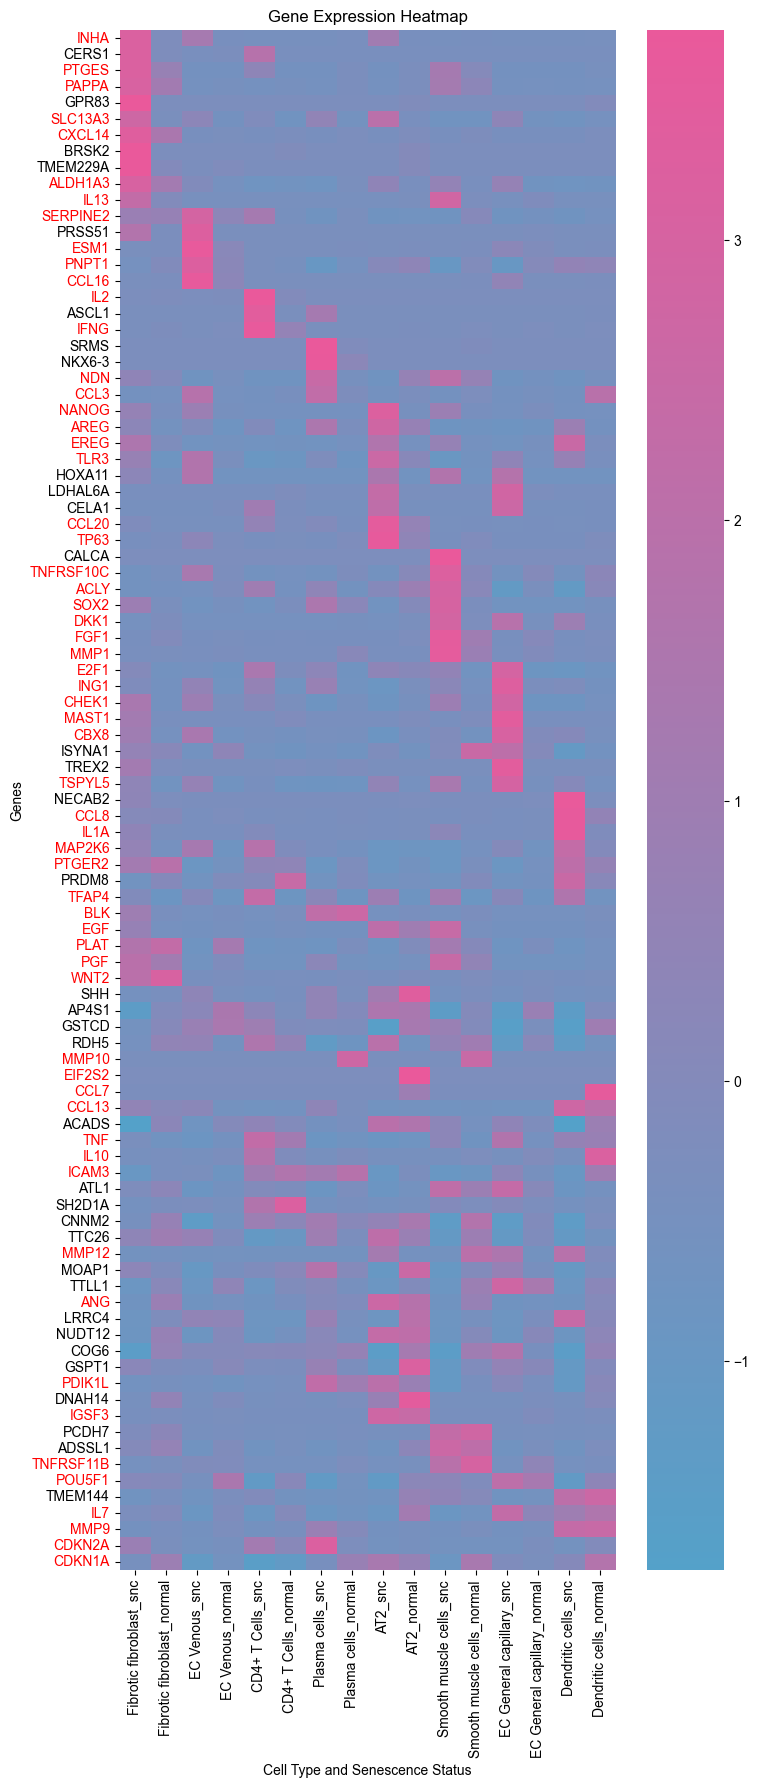

In [163]:
plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')

ax = plt.gca()
ylabels = ax.get_yticklabels()
highlight_genes = ['CDKN2A', 'CDKN1A']  # Specify which genes to highlight

ls1=utils.load_markers(args)
ls1=set([j for i in ls1 for j in i])

for i in gene_list:
    if i in ls1:
        highlight_genes.append(i)

for label in ylabels:
    if label.get_text() in highlight_genes:
        label.set_color('red')

plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")
plt.show()

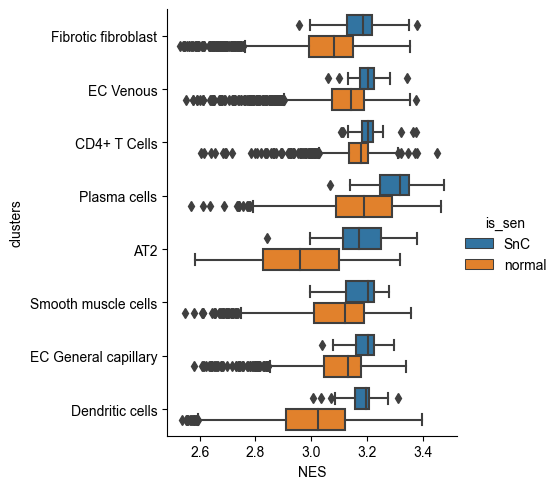

In [164]:
ls2=[ 'INHA',
  'CERS1',
    'PTGES',
 'PAPPA',
'GPR83',
     'SLC13A3',
 'CXCL14',
'BRSK2',
    'TMEM229A',
 'ALDH1A3',
     'IL13',
 'SERPINE2',

 'PRSS51', 
  'ESM1',
 'PNPT1',
 'CCL16',

 'IL2',
     'ASCL1',
     'IFNG',

 'SRMS',
'NKX6-3',
     'NDN',
 'CCL3',

    
     'NANOG',
     'AREG',
     'EREG',
     'TLR3',
 'HOXA11',
     'LDHAL6A',
     'CELA1',
 'CCL20',
     'TP63',
    
    'CALCA',
     'TNFRSF10C',
 'ACLY',
 'SOX2',
     'DKK1',
 'FGF1',
 'MMP1',

    
    'E2F1',
    'ING1',
     'CHEK1',
    'MAST1',
 'CBX8',
 'ISYNA1',
     'TREX2',
 'TSPYL5',
    
    
    'NECAB2',
 'CCL8',
     'IL1A',
 'MAP2K6',

     'PTGER2',
 'PRDM8',
    
 'TFAP4','CDKN2A']


results_df=caculate_GSEA(adata,args,gene_list=ls2)
results_df.index=results_df['Name']
results_df['is_sen']=adata.obs['is_sen']
results_df['clusters']=adata.obs['clusters']
results_df1=results_df[results_df["clusters"].isin(selected_ct)]

# senmayo
import seaborn as sns
sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
           order=selected_ct)

In [203]:

import seaborn as sns
plt.figure(figsize=(10, 8))


g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="box",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)



NameError: name 'results_df1' is not defined

<Figure size 3000x2400 with 0 Axes>

/tmp/ipykernel_1070421/3045331193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df1['NES'] = pd.to_numeric(results_df1['NES'], errors='coerce')


Text(0.5, 1.0, 'GSEA activity score by Cell Type')

<Figure size 1000x800 with 0 Axes>

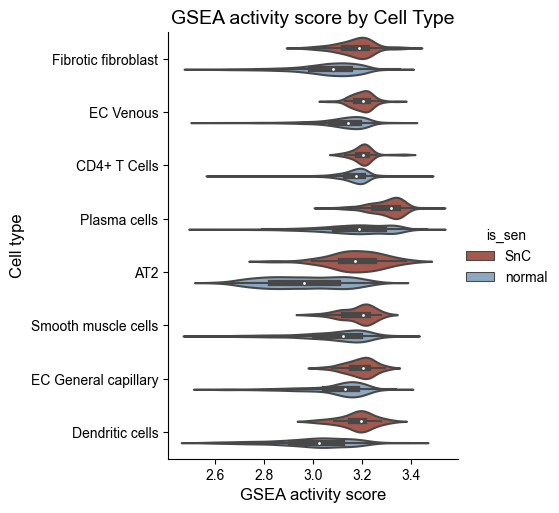

In [180]:

import seaborn as sns
plt.figure(figsize=(10, 8))

results_df1['NES'] = pd.to_numeric(results_df1['NES'], errors='coerce')

g = sns.catplot(results_df1,y='clusters',x='NES',hue='is_sen',kind="violin",orient='h',
            palette={'SnC':'#b14e3f','normal':'#83a8cb'},
           order=selected_ct)
ax = g.ax

# Customizing the x and y labels
ax.set_xlabel('GSEA activity score', fontsize=12)
ax.set_ylabel('Cell type', fontsize=12)

# Customizing the title
ax.set_title('GSEA activity score by Cell Type', fontsize=14)



In [176]:
results_df1

Name  \
Name                                                                                       
PITTS2020_110_LL_CAGCCAGCATGCGCCTACTTTAGG-1  PITTS2020_110_LL_CAGCCAGCATGCGCCTACTTTAGG-1   
OSU10161_LL_ACTTCCTTCGAACCGAATGTTGAC-1            OSU10161_LL_ACTTCCTTCGAACCGAATGTTGAC-1   
PITTS2020_110_UL_GATGGTAGTAAGCTAGAACGGGAA-1  PITTS2020_110_UL_GATGGTAGTAAGCTAGAACGGGAA-1   
PITTS2020_110_LL_AGTGCGGGTTCATTAGACTTTAGG-1  PITTS2020_110_LL_AGTGCGGGTTCATTAGACTTTAGG-1   
PITTS2020_110_UL_AGGAACCGTTTGTTGAAACGGGAA-1  PITTS2020_110_UL_AGGAACCGTTTGTTGAAACGGGAA-1   
...                                                                                  ...   
PITTS2020_110_UL_CCAAACTGTGCATTACAACGGGAA-1  PITTS2020_110_UL_CCAAACTGTGCATTACAACGGGAA-1   
PITTS2020_110_UL_CTGAATCGTAGTTGTCAACGGGAA-1  PITTS2020_110_UL_CTGAATCGTAGTTGTCAACGGGAA-1   
PITTS2020_110_UL_GATCATAAGGCGCGATAACGGGAA-1  PITTS2020_110_UL_GATCATAAGGCGCGATAACGGGAA-1   
PITTS2020_110_UL_GGCTGATCACAGCAACAACGGGAA-1  PITTS2020_110_UL_GGCTGATCACAGCAACAACGGGAA-1   
PITTS2020_110_UL_TAACGAATCCCTCATTAACGGGAA-1  PITTS2020_110_UL_TAACGAATCCCTCATTAACGGGAA-1   

                                                 Term           ES       NES  \
Name                                                                           
PITTS2020_110_LL_CAGCCAGCATGCGCCTACTTTAGG-1  GeneSet1  5262.042279  3.476866   
OSU10161_LL_ACTTCCTTCGAACCGAATGTTGAC-1       GeneSet1  5243.769065  3.464792   
PITTS2020_110_UL_GATGGTAGTAAGCTAGAACGGGAA-1  GeneSet1  5221.343961  3.449974   
PITTS2020_110_LL_AGTGCGGGTTCATTAGACTTTAGG-1  GeneSet1   5139.99342  3.396223   
PITTS2020_110_UL_AGGAACCGTTTGTTGAAACGGGAA-1  GeneSet1  5117.196682   3.38116   
...                                               ...          ...       ...   
PITTS2020_110_UL_CCAAACTGTGCATTACAACGGGAA-1  GeneSet1   3849.40808  2.543475   
PITTS2020_110_UL_CTGAATCGTAGTTGTCAACGGGAA-1  GeneSet1  3849.043177  2.543234   
PITTS2020_110_UL_GATCATAAGGCGCGATAACGGGAA-1  GeneSet1  3844.518379  2.540244   
PITTS2020_110_UL_GGCTGATCACAGCAACAACGGGAA-1  GeneSet1  3836.253325  2.534783   
PITTS2020_110_UL_TAACGAATCCCTCATTAACGGGAA-1  GeneSet1  3828.353173  2.529563   

                                             is_sen             clusters  
Name                                                                      
PITTS2020_110_LL_CAGCCAGCATGCGCCTACTTTAGG-1     SnC         Plasma cells  
OSU10161_LL_ACTTCCTTCGAACCGAATGTTGAC-1       normal         Plasma cells  
PITTS2020_110_UL_GATGGTAGTAAGCTAGAACGGGAA-1  normal         CD4+ T Cells  
PITTS2020_110_LL_AGTGCGGGTTCATTAGACTTTAGG-1  normal      Dendritic cells  
PITTS2020_110_UL_AGGAACCGTTTGTTGAAACGGGAA-1     SnC  Fibrotic fibroblast  
...                                             ...                  ...  
PITTS2020_110_UL_CCAAACTGTGCATTACAACGGGAA-1  normal  Fibrotic fibroblast  
PITTS2020_110_UL_CTGAATCGTAGTTGTCAACGGGAA-1  normal  Fibrotic fibroblast  
PITTS2020_110_UL_GATCATAAGGCGCGATAACGGGAA-1  normal  Fibrotic fibroblast  
PITTS2020_110_UL_GGCTGATCACAGCAACAACGGGAA-1  normal      Dendritic cells  
PITTS2020_110_UL_TAACGAATCCCTCATTAACGGGAA-1  normal  Fibrotic fibroblast  

[12075 rows x 6 columns]

In [183]:
gene_list = [
 'INHA',
  'CERS1',
    'PTGES',
 'PAPPA',
'GPR83',
     'SLC13A3',
 'CXCL14',
'BRSK2',
    'TMEM229A',
 'ALDH1A3',
     'IL13',
 'SERPINE2',

 'PRSS51', 
  'ESM1',
 'PNPT1',
 'CCL16',

 'IL2',
     'ASCL1',
     'IFNG',

 'SRMS',
'NKX6-3',
     'NDN',
 'CCL3',

    
     'NANOG',
     'AREG',
     'EREG',
     'TLR3',
 'HOXA11',
     'LDHAL6A',
     'CELA1',
 'CCL20',
     'TP63',
    
    'CALCA',
     'TNFRSF10C',
 'ACLY',
 'SOX2',
     'DKK1',
 'FGF1',
 'MMP1',

    
    'E2F1',
    'ING1',
     'CHEK1',
    'MAST1',
 'CBX8',
 'ISYNA1',
     'TREX2',
 'TSPYL5',
    
    
    'NECAB2',
 'CCL8',
     'IL1A',
 'MAP2K6',

     'PTGER2',
 'PRDM8',"TFAP4"
]


for i in gene_list:
    print(i)

INHA
CERS1
PTGES
PAPPA
GPR83
SLC13A3
CXCL14
BRSK2
TMEM229A
ALDH1A3
IL13
SERPINE2
PRSS51
ESM1
PNPT1
CCL16
IL2
ASCL1
IFNG
SRMS
NKX6-3
NDN
CCL3
NANOG
AREG
EREG
TLR3
HOXA11
LDHAL6A
CELA1
CCL20
TP63
CALCA
TNFRSF10C
ACLY
SOX2
DKK1
FGF1
MMP1
E2F1
ING1
CHEK1
MAST1
CBX8
ISYNA1
TREX2
TSPYL5
NECAB2
CCL8
IL1A
MAP2K6
PTGER2
PRDM8
TFAP4


In [184]:
adata

AnnData object with n_obs × n_vars = 24125 × 15844
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflammatory.fibrob

In [186]:
new_data

View of AnnData object with n_obs × n_vars = 24125 × 15844
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflammator

matrix([[1, 0, 0, ..., 0, 8, 0],
        [2, 0, 0, ..., 0, 2, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 2, 0]])

(None,)

['Fibrotic fibroblast',
 'EC Venous',
 'CD4+ T Cells',
 'Plasma cells',
 'AT2',
 'Smooth muscle cells',
 'EC General capillary',
 'Dendritic cells']

In [210]:
adata

AnnData object with n_obs × n_vars = 24125 × 15844
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'Sample', 'Treatment', 'Injury', 'Status', 'Area', 'Type', 'Age', 'Age_Status', 'Sex', 'Treatment_Age_Status', 'Treatment_Age_Status_Sex', 'Treatment_Age_Status_Sex_Area', 'Names_Sample', 'Names_Age_Status', 'Names_Sample_Age_Status', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'integrated_snn_res.0.5', 'predicted.id', 'prediction.score.SCGB3A2..SCGB1A1..club', 'prediction.score.Plasma.cells', 'prediction.score.CD4..T.Cells', 'prediction.score.Goblet', 'prediction.score.B.cells', 'prediction.score.EC.Arterial', 'prediction.score.Smooth.muscle.cells', 'prediction.score.Ciliated', 'prediction.score.Proliferating.fibroblasts', 'prediction.score.AT2', 'prediction.score.SPP1..macrophages', 'prediction.score.Monocyte.derived.macrophage', 'prediction.score.Alveolar.fibroblasts', 'prediction.score.Mast.cells', 'prediction.score.Inflammatory.fibrob

['Fibrotic fibroblast',
 'SnC_Fibrotic fibroblast',
 'EC Venous',
 'SnC_EC Venous',
 'CD4+ T Cells',
 'SnC_CD4+ T Cells',
 'Plasma cells',
 'SnC_Plasma cells',
 'AT2',
 'SnC_AT2',
 'Smooth muscle cells',
 'SnC_Smooth muscle cells',
 'EC General capillary',
 'SnC_EC General capillary',
 'Dendritic cells',
 'SnC_Dendritic cells']

In [6]:
# using the results of epoch 4

file_path=f'./outputs/backbone-newfix/newfix_sencellgene-epoch{4}.data'
sencell_dict,sen_gene_ls,attention_scores,edge_index_selfloop=torch.load(file_path)
sencell_indexs=list(sencell_dict.keys())

a=dict(check_celltypes(sencell_indexs))
sorted_dict = dict(sorted(a.items(), key=lambda item: item[1], reverse=True))

# select cell types
selected_ct=['Fibrotic fibroblast',
 'EC Venous',
 'CD4+ T Cells',
 'Plasma cells',
 'AT2',
 'Smooth muscle cells',
 'EC General capillary',
 'Dendritic cells']

sencell_indexs_updated=[]
for i in sencell_indexs:
    ct=adata.obs.iloc[i-new_data.shape[1]].clusters
    if ct in selected_ct:
        sencell_indexs_updated.append(i)
        
sencell_indexs=sencell_indexs_updated
row_indices= np.array(sencell_indexs)-new_data.shape[1]
new_column = np.array(['normal']*adata.shape[0])
new_column[row_indices] = 'SnC'
adata.obs['is_sen'] = new_column

adata.obs['clusters']=adata.obs['clusters'].astype(str)

def create_column(row):
    if row['is_sen']=='SnC':
        return 'SnC'
    else:
        return row['clusters']
adata.obs['new_ct'] = adata.obs.apply(create_column, axis=1)

print(f"Number of SnC: {adata.obs['is_sen'].value_counts()['SnC']}")

sub_sencells=adata[adata.obs['is_sen']=='SnC']
sub_sencells=sub_sencells[sub_sencells.obs["clusters"].isin(selected_ct)]
get_plot(sub_sencells)
get_plot1(sub_sencells)
get_plot2(sub_sencells)

snc in different cell types:  Counter({'EC Venous': 87, 'Fibrotic fibroblast': 82, 'CD4+ T Cells': 72, 'Plasma cells': 70, 'EC Arterial': 46, 'AT2': 44, 'EC General capillary': 36, 'Dendritic cells': 34, 'Smooth muscle cells': 31, 'Ciliated': 27, 'Monocyte': 26, 'CD8+ T Cells': 26, 'Monocyte-derived macrophage': 22, 'Alveolar fibroblasts': 18, 'SCGB3A2+/SCGB1A1+ club': 18, 'MUC5B+ club': 16, 'B cells': 15, 'NK cells': 14, 'SPP1+ macrophages': 13, 'KRT5-/KRT17+ cells': 13, 'EC Lymphatic': 10, 'AT1': 8, 'Goblet': 6, 'Mast cells': 6, 'Alveolar macrophages': 5, 'Pericyte': 3})
Number of SnC: 456


NameError: name 'get_plot' is not defined

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [17]:
gene_scores=torch.tensor(gene_scores)

In [24]:
gene_scores_sub=gene_scores[sen_gene_ls]

In [26]:
gene_scores_sub.shape

torch.Size([285, 8])

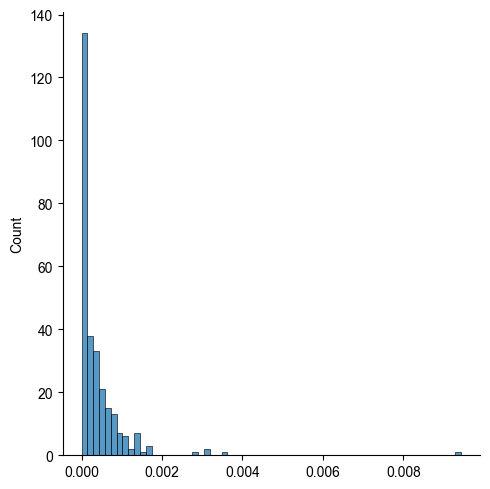

In [27]:
sns.displot(gene_scores_sub[:,0])

AT2 151
Smooth muscle cells 135
Plasma cells 189
EC Venous 213
Dendritic cells 122
CD4+ T Cells 178
Fibrotic fibroblast 185
EC General capillary 175


AT2 6869
Plasma cells 7894
CD4+ T Cells 5542
Smooth muscle cells 7256
Dendritic cells 6973
Fibrotic fibroblast 6800
EC Venous 6922
EC General capillary 6840


Fibrotic fibroblast 79
EC Venous 86
CD4+ T Cells 44
Plasma cells 113
AT2 61
Smooth muscle cells 71
EC General capillary 70
Dendritic cells 49


In [ ]:
# heatmap to check the overlap_genes

In [ ]:
# uniqueness


In [55]:
gene_list = updated_ls

cell_types=selected_ct
adata=adata1.copy()

data = {}
for gene in gene_list:
    gene_expression = []
    for cell_type in cell_types:
        normal_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'normal')].X[:, adata.var.index == gene].mean()
        snc_expr = adata[(adata.obs['clusters'] == cell_type) & (adata.obs['is_sen'] == 'SnC')].X[:, adata.var.index == gene].mean()
        gene_expression.append(snc_expr)
        gene_expression.append(normal_expr)
    data[gene] = gene_expression

# Create a DataFrame
columns = []
for cell_type in cell_types:
    columns.append(f"{cell_type}_snc")
    columns.append(f"{cell_type}_normal")


df = pd.DataFrame(data, index=columns).T
df = df.astype(float)

# Plot the heatmap

df_normalized = (df - df.mean(axis=1).values.reshape(-1, 1)) / df.std(axis=1).values.reshape(-1, 1)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#54a1c9','#ea599b'])

plt.figure(figsize=(8, 20))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()

[{'clusters': 'Fibrotic fibroblast', 'specific_snc_genes': ['HSPA2']},
 {'clusters': 'EC Venous', 'specific_snc_genes': ['CDKN2A', 'IL15']},
 {'clusters': 'CD4+ T Cells',
  'specific_snc_genes': ['CDKN2A', 'PTTG1', 'SOX2', 'IL15', 'CSF2']},
 {'clusters': 'Plasma cells',
  'specific_snc_genes': ['CDKN2A', 'NDN', 'PTTG1', 'IL15']},
 {'clusters': 'AT2',
  'specific_snc_genes': ['IGSF3', 'PTTG1', 'CXCL3', 'CSF2']},
 {'clusters': 'Smooth muscle cells',
  'specific_snc_genes': ['NDN', 'IL15', 'CSF2']},
 {'clusters': 'EC General capillary', 'specific_snc_genes': ['PTTG1']},
 {'clusters': 'Dendritic cells',
  'specific_snc_genes': ['CCL8', 'PTTG1', 'CXCL3', 'IL15']}]

In [54]:
updated_ls

['HSPA2',
 'CDKN2A',
 'IL15',
 'PTTG1',
 'SOX2',
 'CSF2',
 'NDN',
 'IGSF3',
 'CXCL3',
 'CCL8']

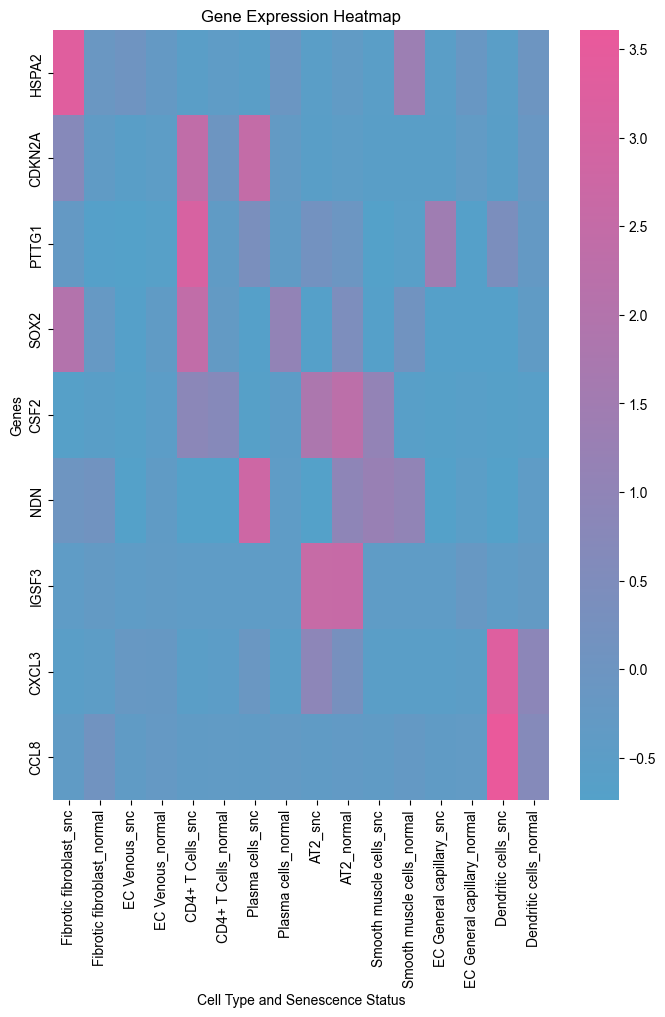

In [60]:
plt.figure(figsize=(8, 10))
sns.heatmap(df_normalized, annot=False, cmap=cmap)
plt.title('Gene Expression Heatmap')
plt.ylabel('Genes')
plt.xlabel('Cell Type and Senescence Status')
plt.show()